In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Читаем целевую колонку из каждого файла excel

In [2]:
df_cond = pd.read_excel('data/COND_dv (25.05-01.06).xls.xlsx', usecols='C', header=None)
df_do = pd.read_excel('data/DO_dv (04.05-11.05).xls.xlsx', usecols='C', header=None)
df_o2 = pd.read_excel('data/O2_dv (11.05-18.05).xls.xlsx', usecols='C', header=None)
df_orp = pd.read_excel('data/ORP_dv (15.06-22.06).xls.xlsx', usecols='C', header=None)
df_ph = pd.read_excel('data/pH_dv (18.05-25.05).xls.xlsx', usecols='C', header=None)
df_tds = pd.read_excel('data/TDS_dv (01.05-08.06).xls.xlsx', usecols='C', header=None)

## Находим файл с меньшим числом измерений

In [22]:
print(len(df_cond))
print(len(df_do))
print(len(df_o2))
print(len(df_orp))
print(len(df_ph))
print(len(df_tds))

true_len = len(df_o2)

595835
599824
593195
596894
595834
597074


## Собираем все колонки в единый файл с 593195 строками

In [30]:
df = pd.DataFrame()

df['cond'] = df_cond[2][0:true_len]
df['do'] = df_do[2][0:true_len]
df['o2'] = df_o2[2][0:true_len]
df['orp'] = df_orp[2][0:true_len]
df['ph'] = df_ph[2][0:true_len]
df['tds'] = df_tds[2][0:true_len]

df

,cond,do,o2,orp,ph,tds
0,308.0,8.27,119.6,447.5,8.96,376
1,302.0,8.23,116.8,447.5,7.81,376
2,300.0,8.18,114.7,447.5,7.58,376
3,306.0,8.13,112.8,447.5,7.48,376
4,297.0,8.09,111.0,447.5,7.43,374
...,...,...,...,...,...,...
593190,183.6,4.48,68.2,303.0,6.52,343
593191,189.4,4.48,68.4,303.1,6.52,342
593192,194.0,4.48,68.2,303.6,6.52,343
593193,182.5,4.48,68.2,302.9,6.52,341


## Создаем имитированную колонку с временным индексом

In [31]:
dt_fmt = "%m/%d/%Y:%H:%M:%S"


def get_date_range(dt_from, dt_to, freq="1D", dt_fmt=dt_fmt, **kwargs):
    dt_from = pd.to_datetime(dt_from, format=dt_fmt)
    dt_to = pd.to_datetime(dt_to, format=dt_fmt)
    return pd.date_range(dt_from, dt_to, freq=freq, **kwargs)


time = get_date_range("10/20/2022:00:00:05", "10/26/2022:20:46:39", freq="1S")

print(len(time))

df['date'] = time
df['date'] = pd.to_datetime(df['date'])
df

593195


,cond,do,o2,orp,ph,tds,date
0,308.0,8.27,119.6,447.5,8.96,376,2022-10-20 00:00:05
1,302.0,8.23,116.8,447.5,7.81,376,2022-10-20 00:00:06
2,300.0,8.18,114.7,447.5,7.58,376,2022-10-20 00:00:07
3,306.0,8.13,112.8,447.5,7.48,376,2022-10-20 00:00:08
4,297.0,8.09,111.0,447.5,7.43,374,2022-10-20 00:00:09
...,...,...,...,...,...,...,...
593190,183.6,4.48,68.2,303.0,6.52,343,2022-10-26 20:46:35
593191,189.4,4.48,68.4,303.1,6.52,342,2022-10-26 20:46:36
593192,194.0,4.48,68.2,303.6,6.52,343,2022-10-26 20:46:37
593193,182.5,4.48,68.2,302.9,6.52,341,2022-10-26 20:46:38


## Вывод графиков каждого параметра

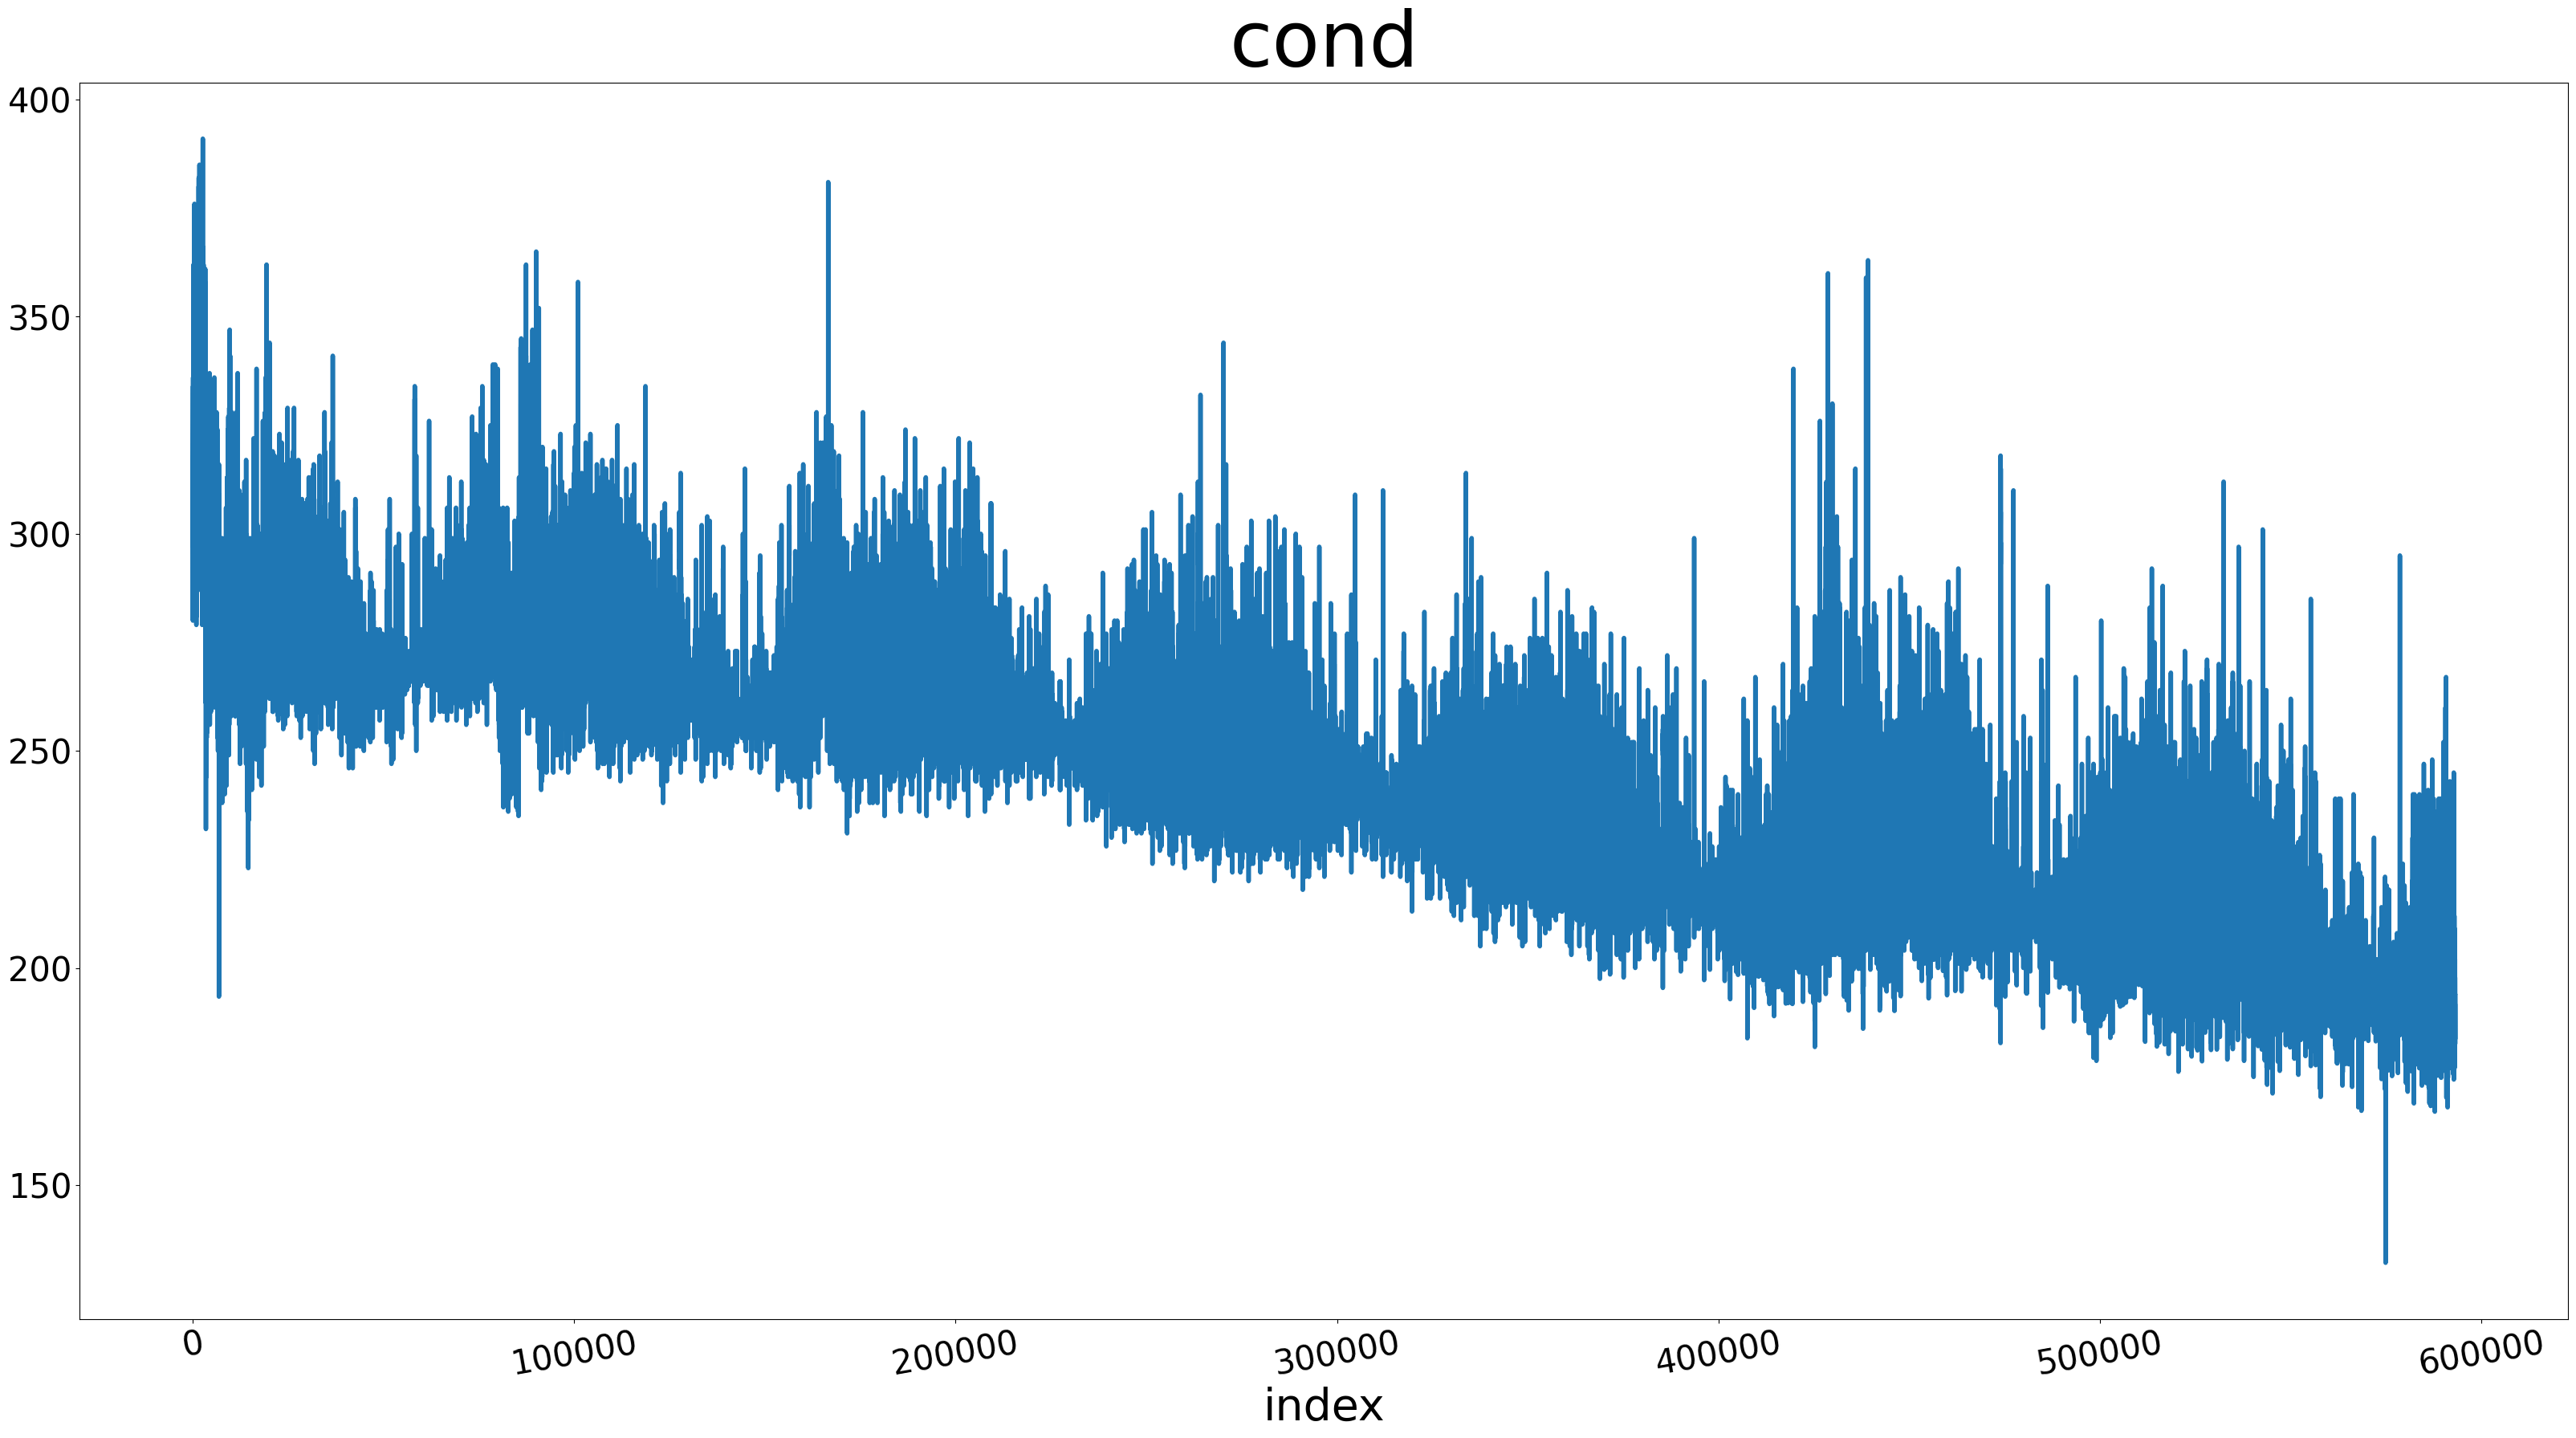

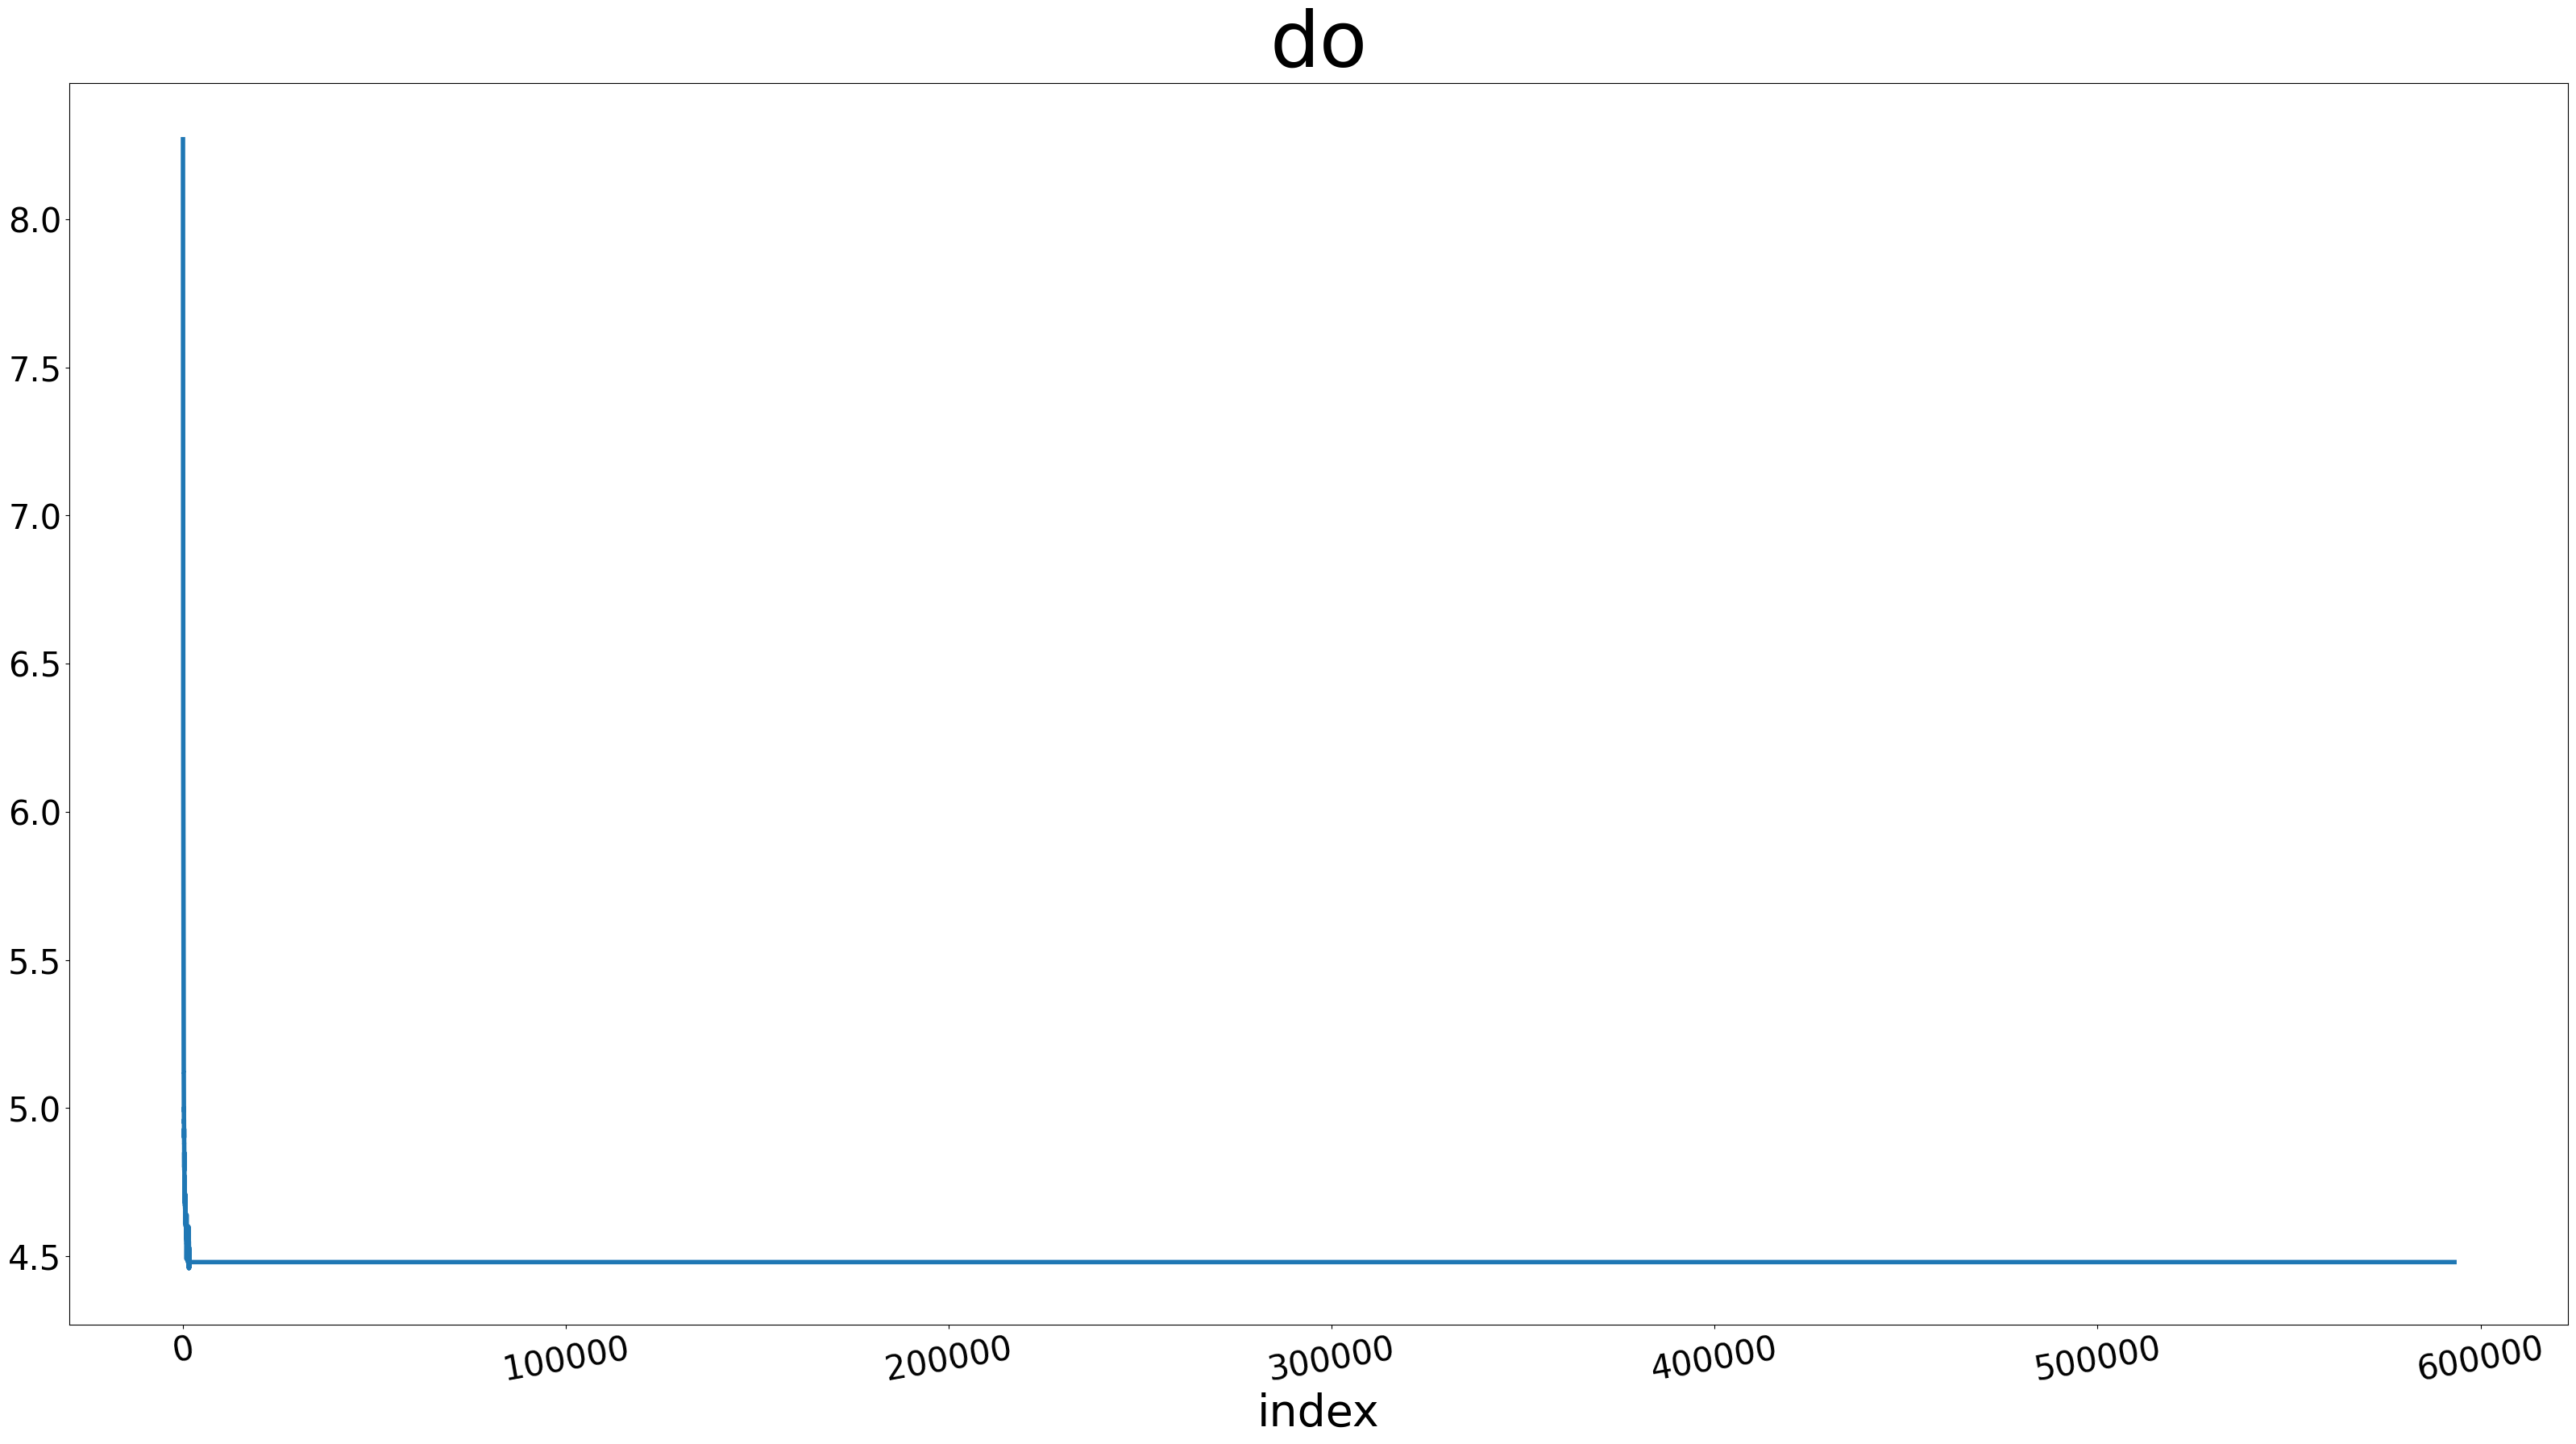

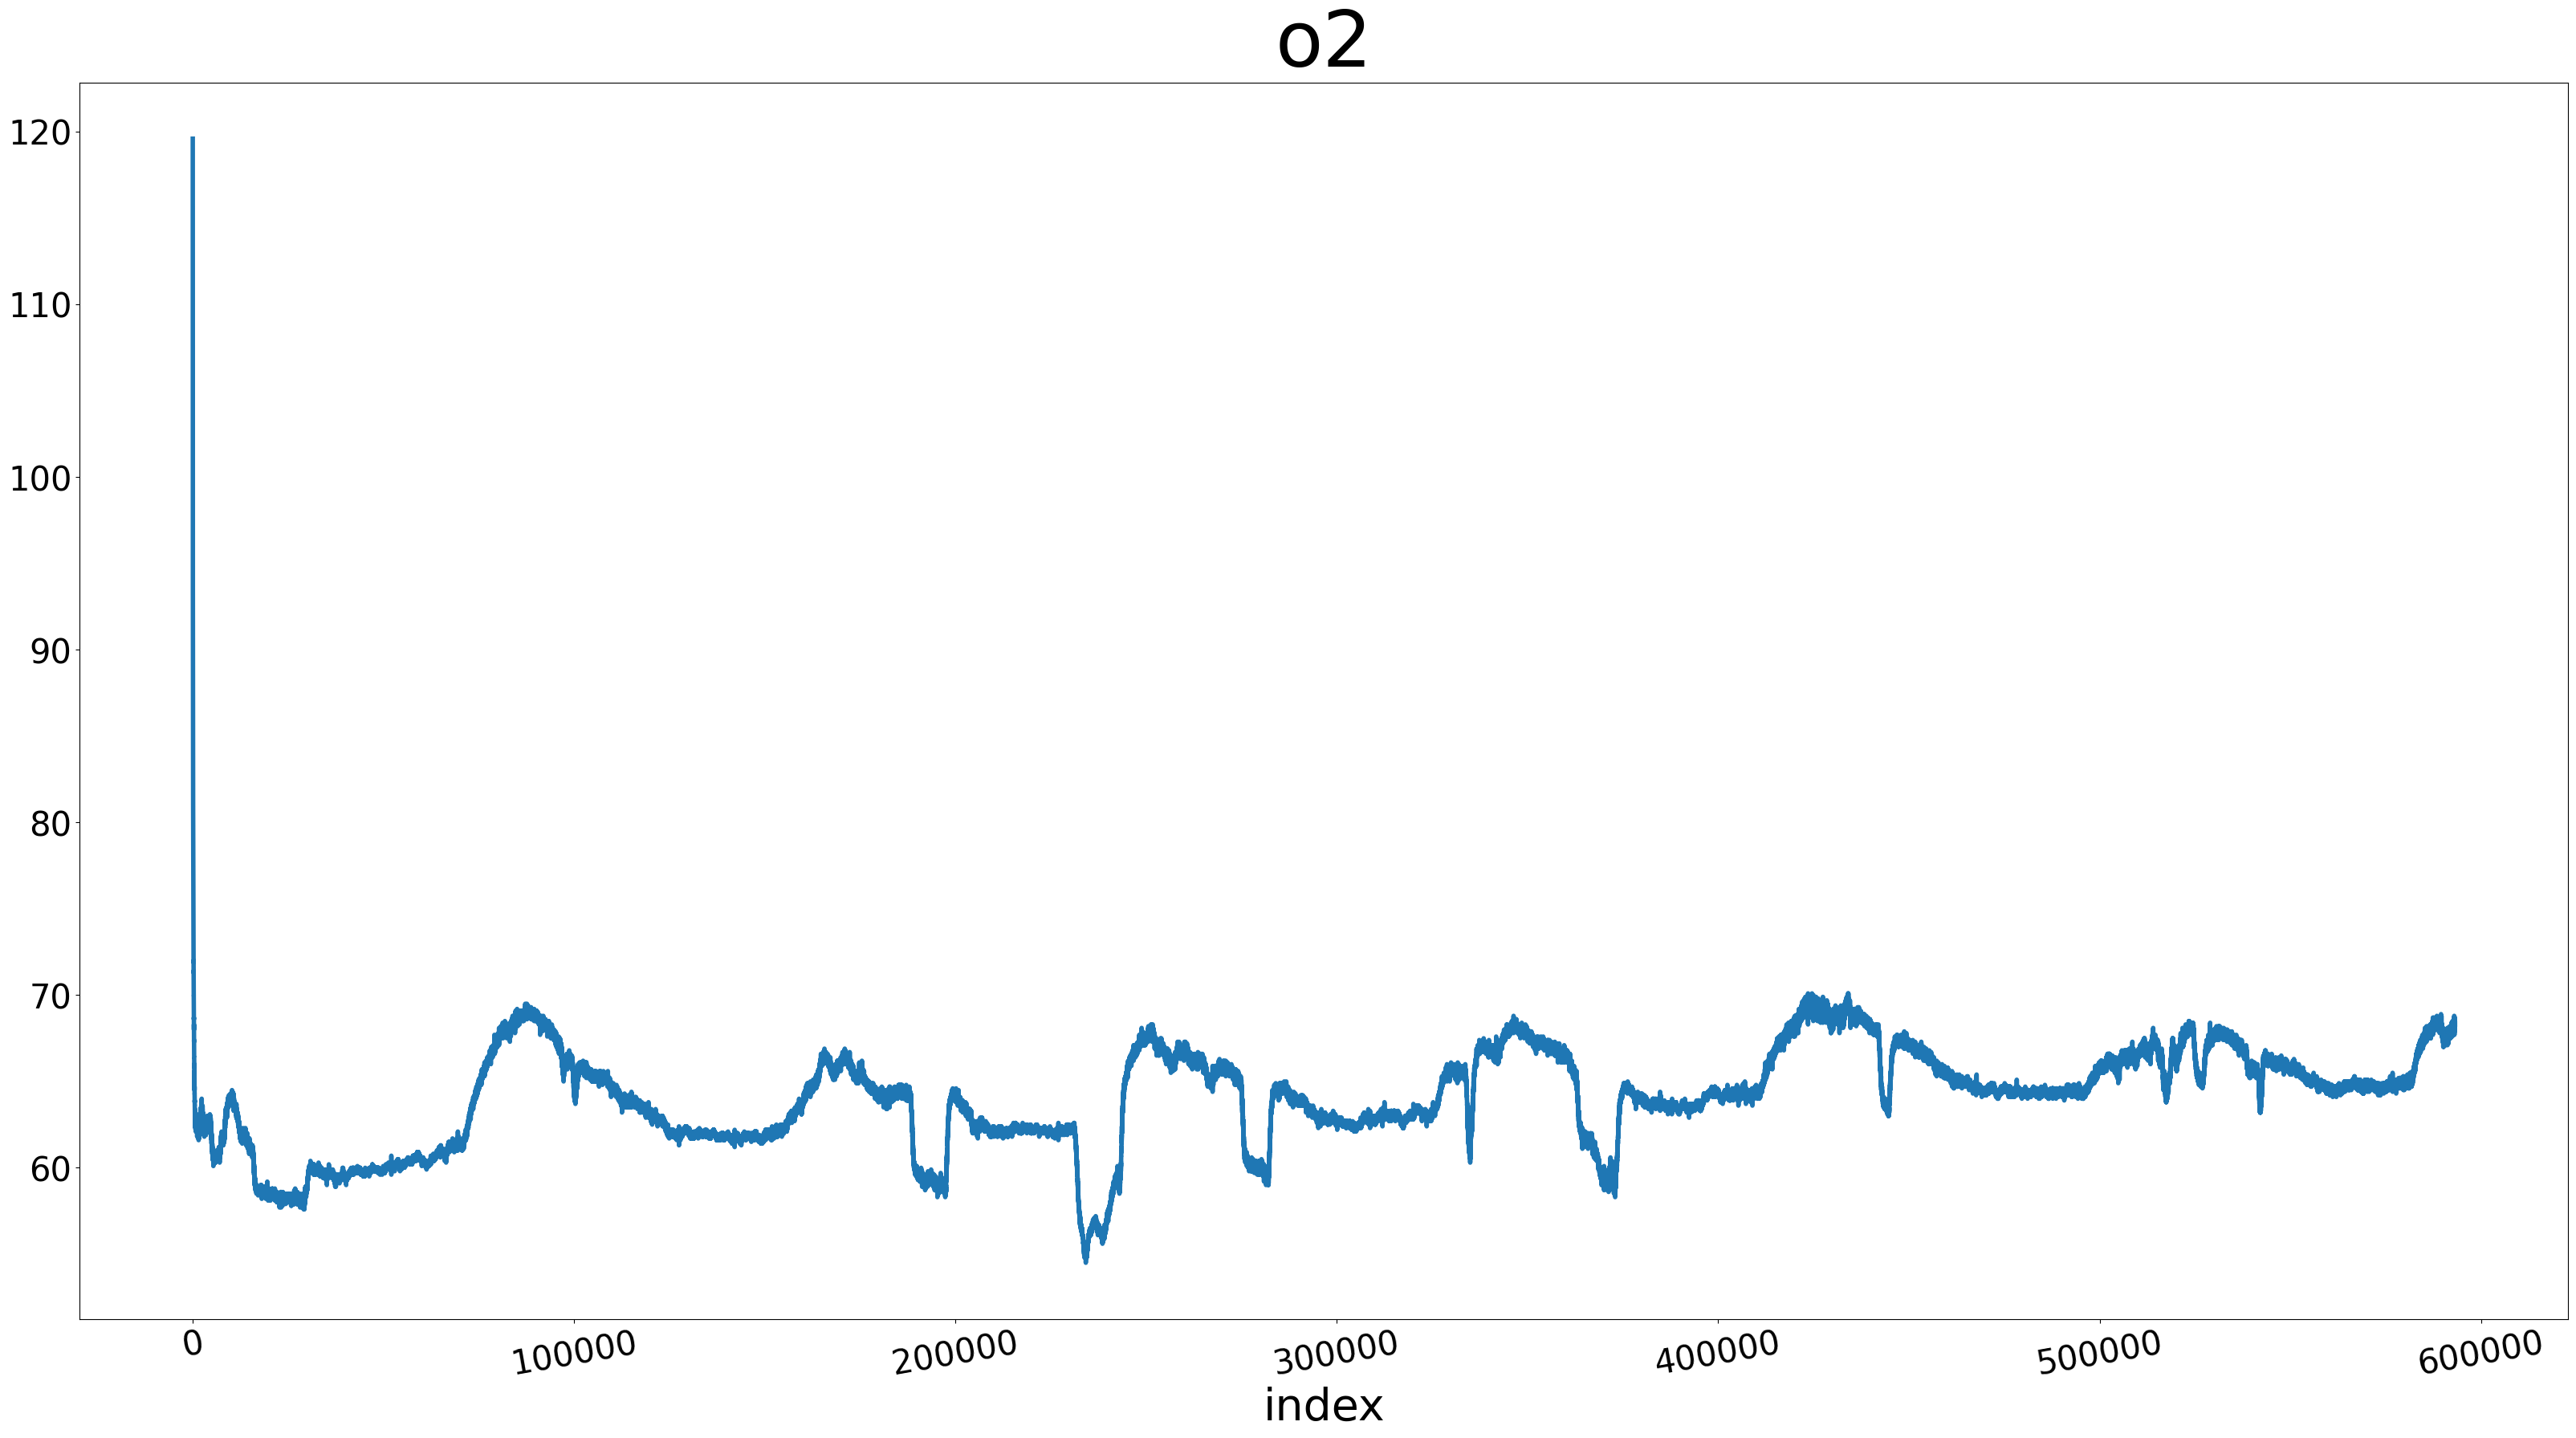

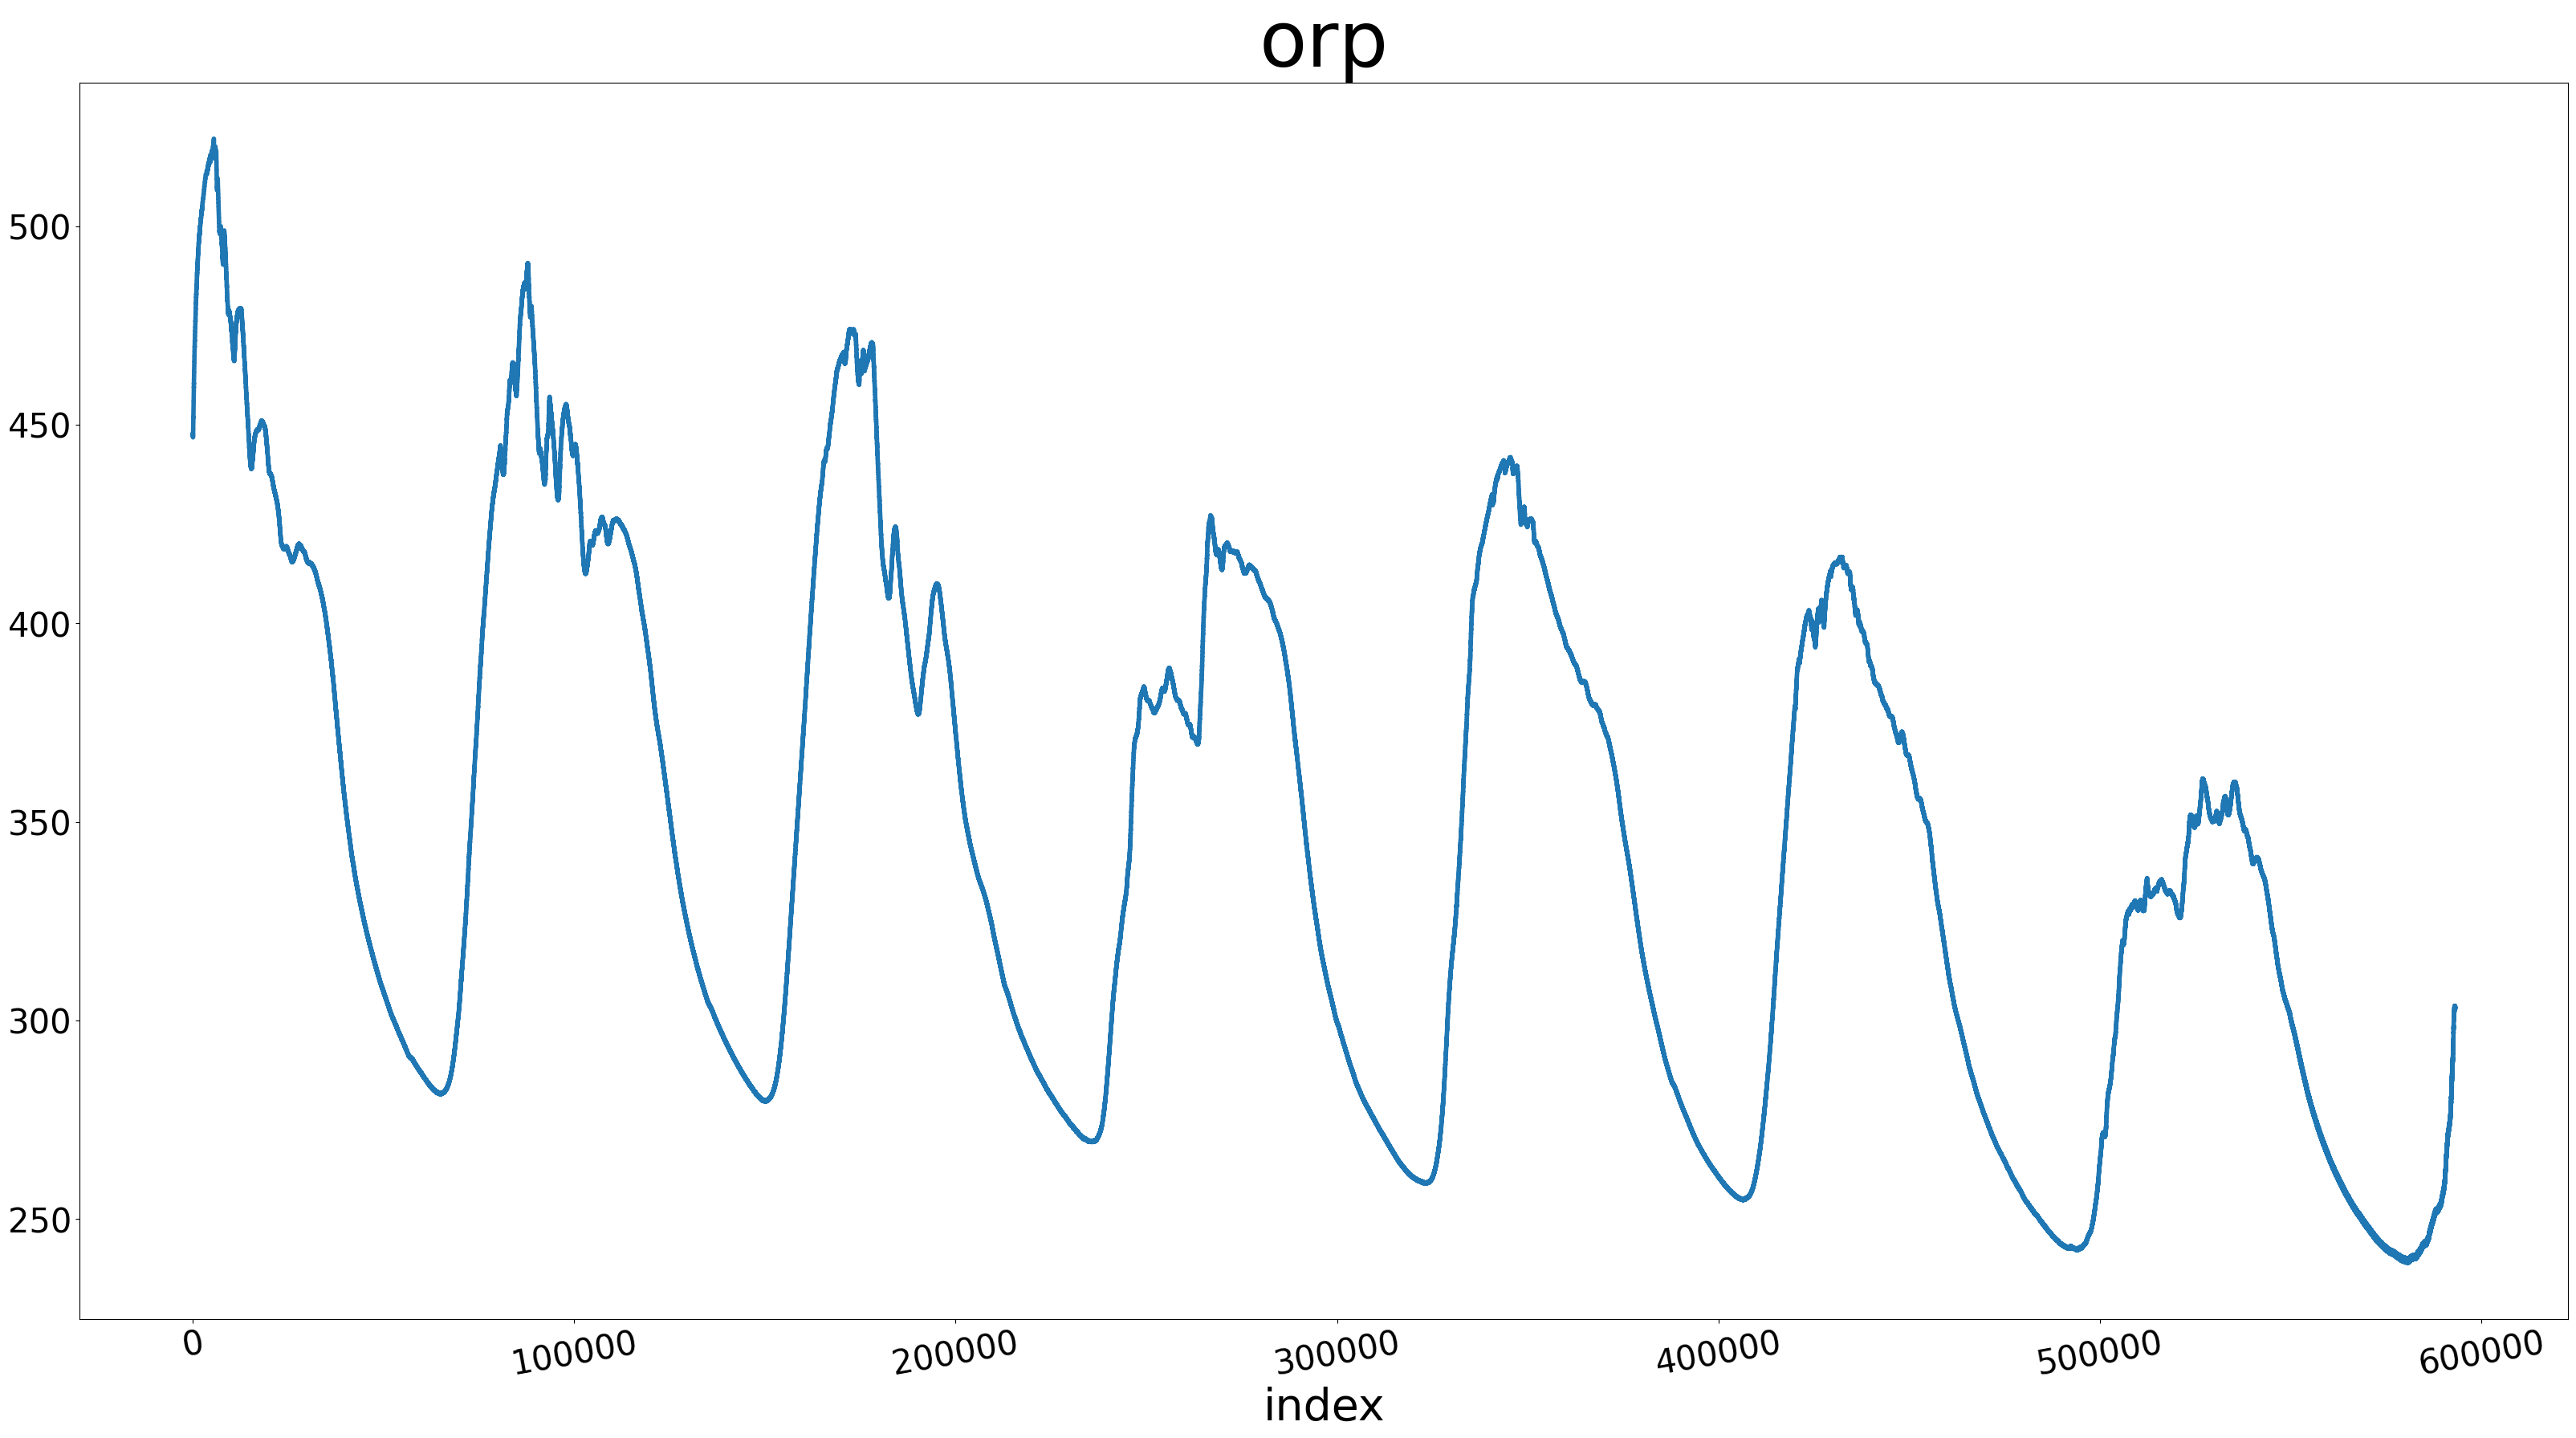

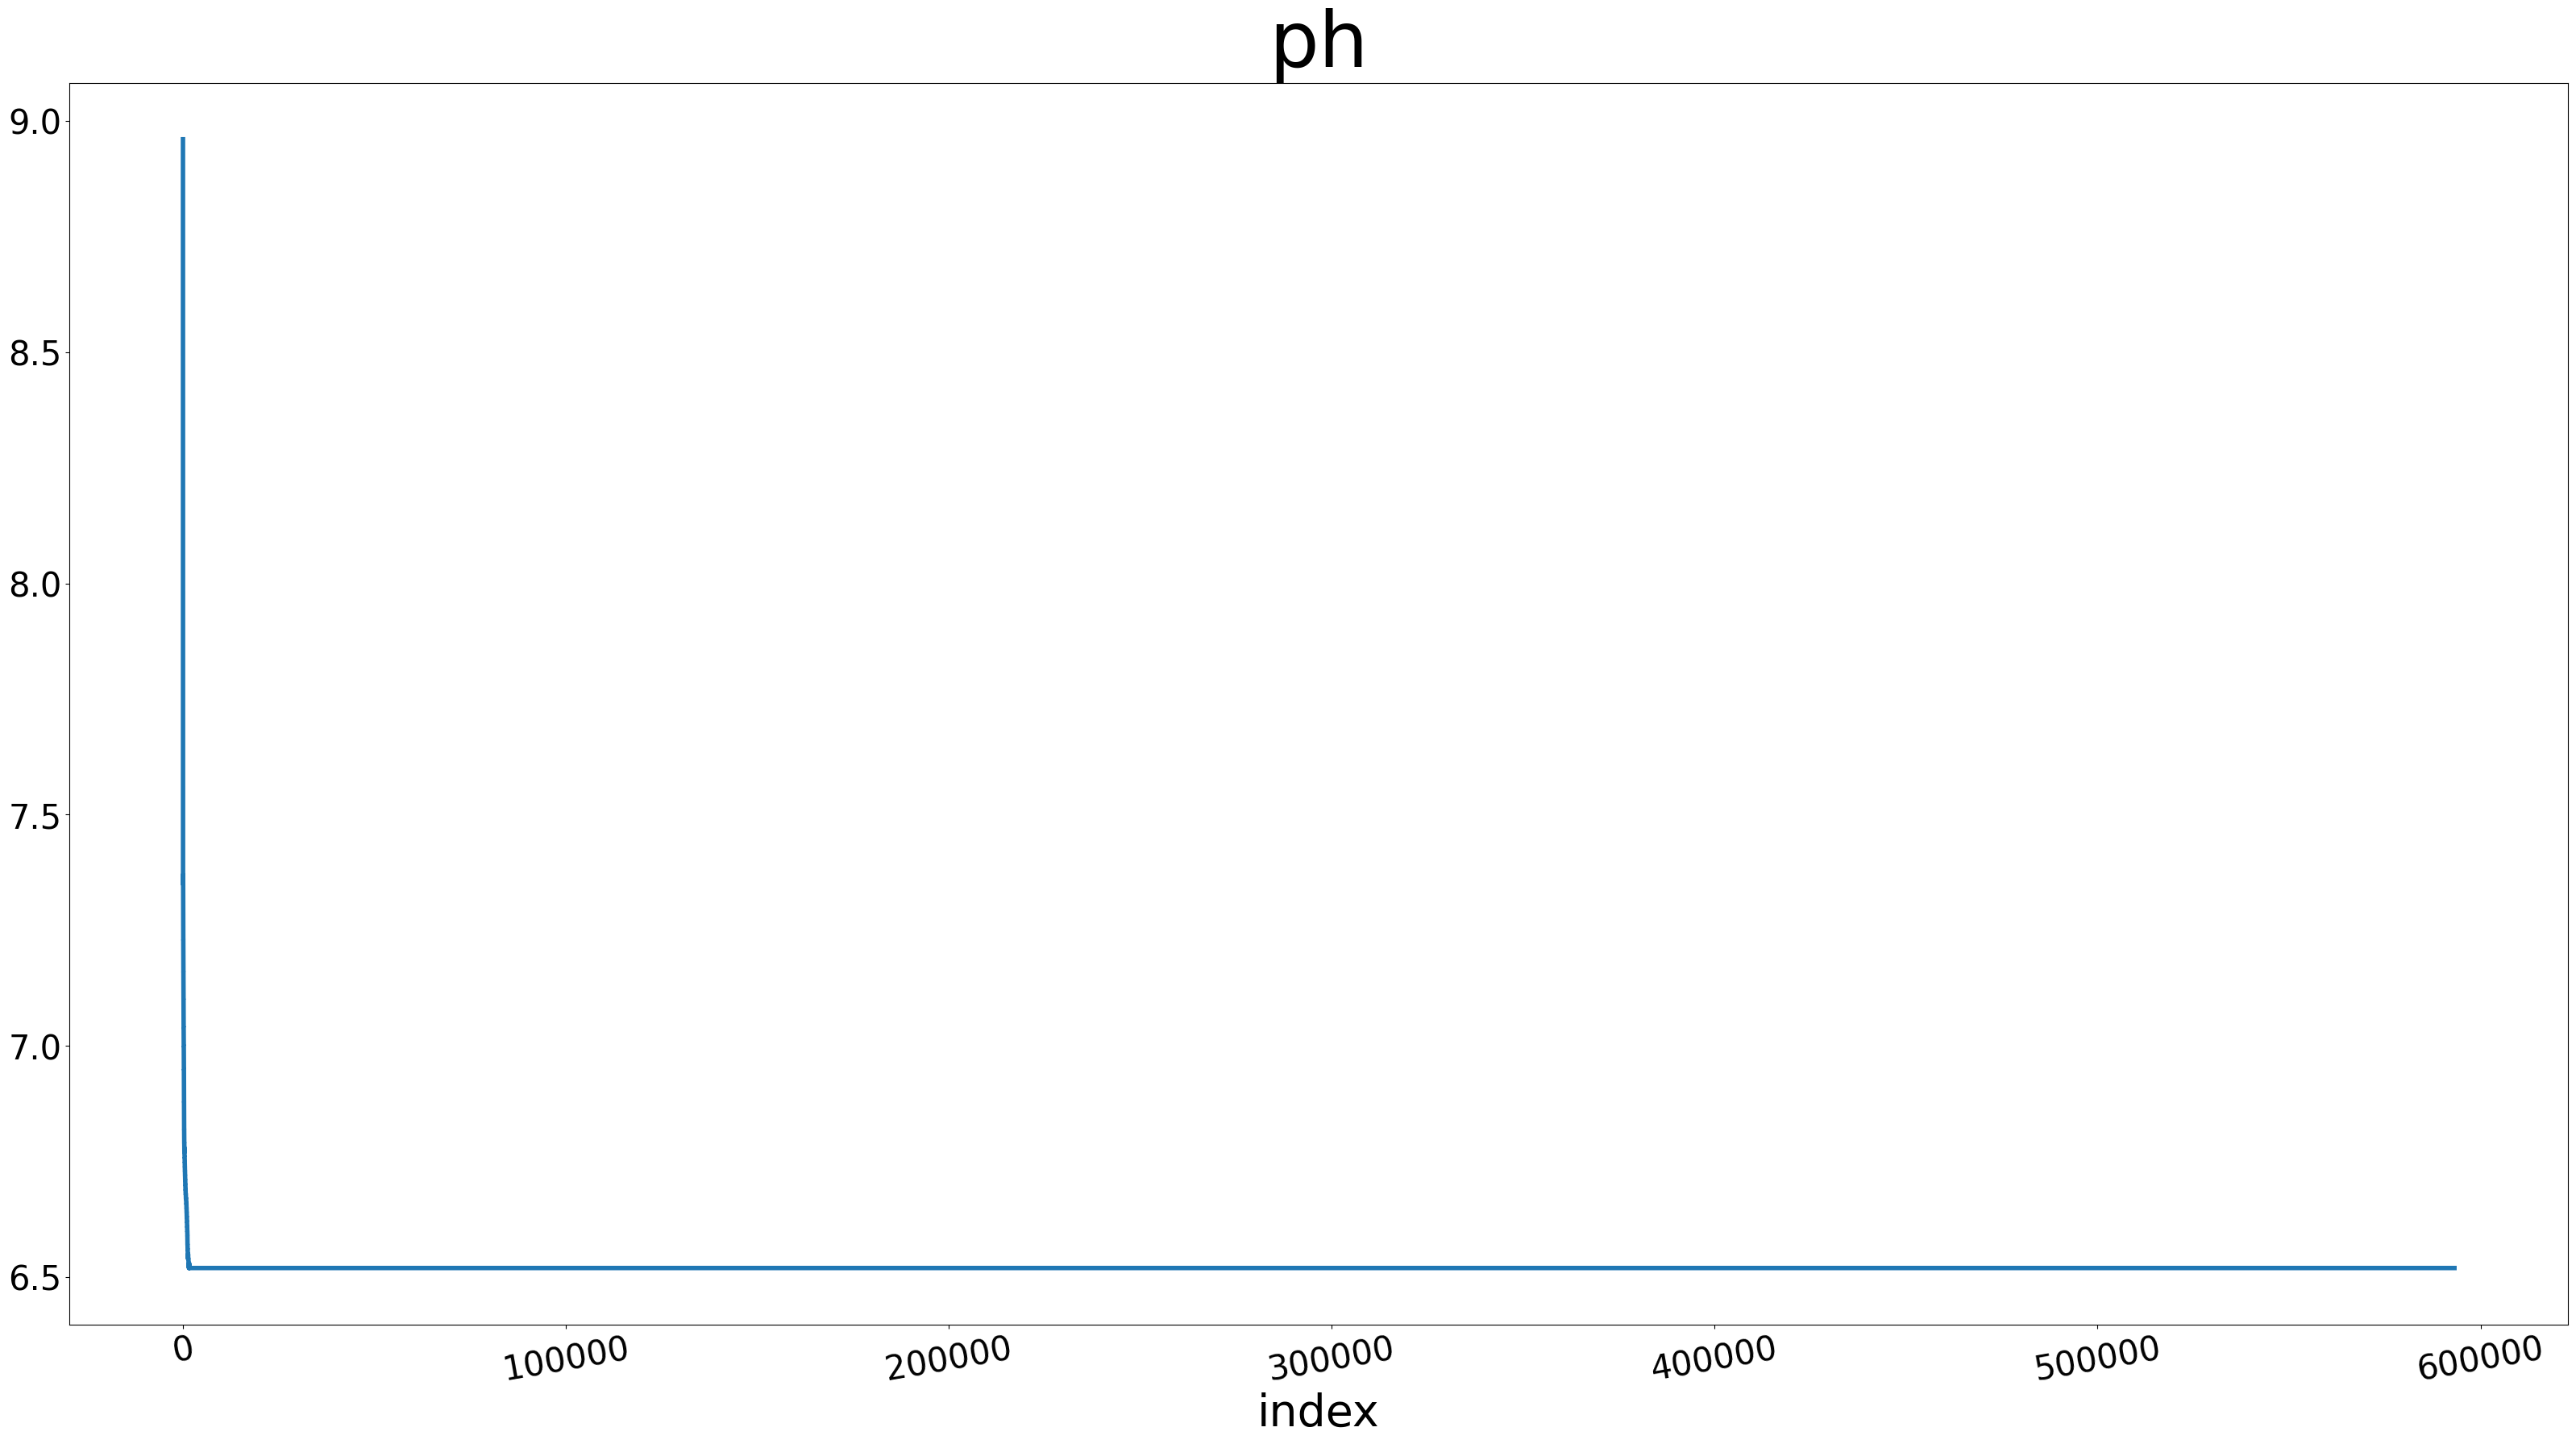

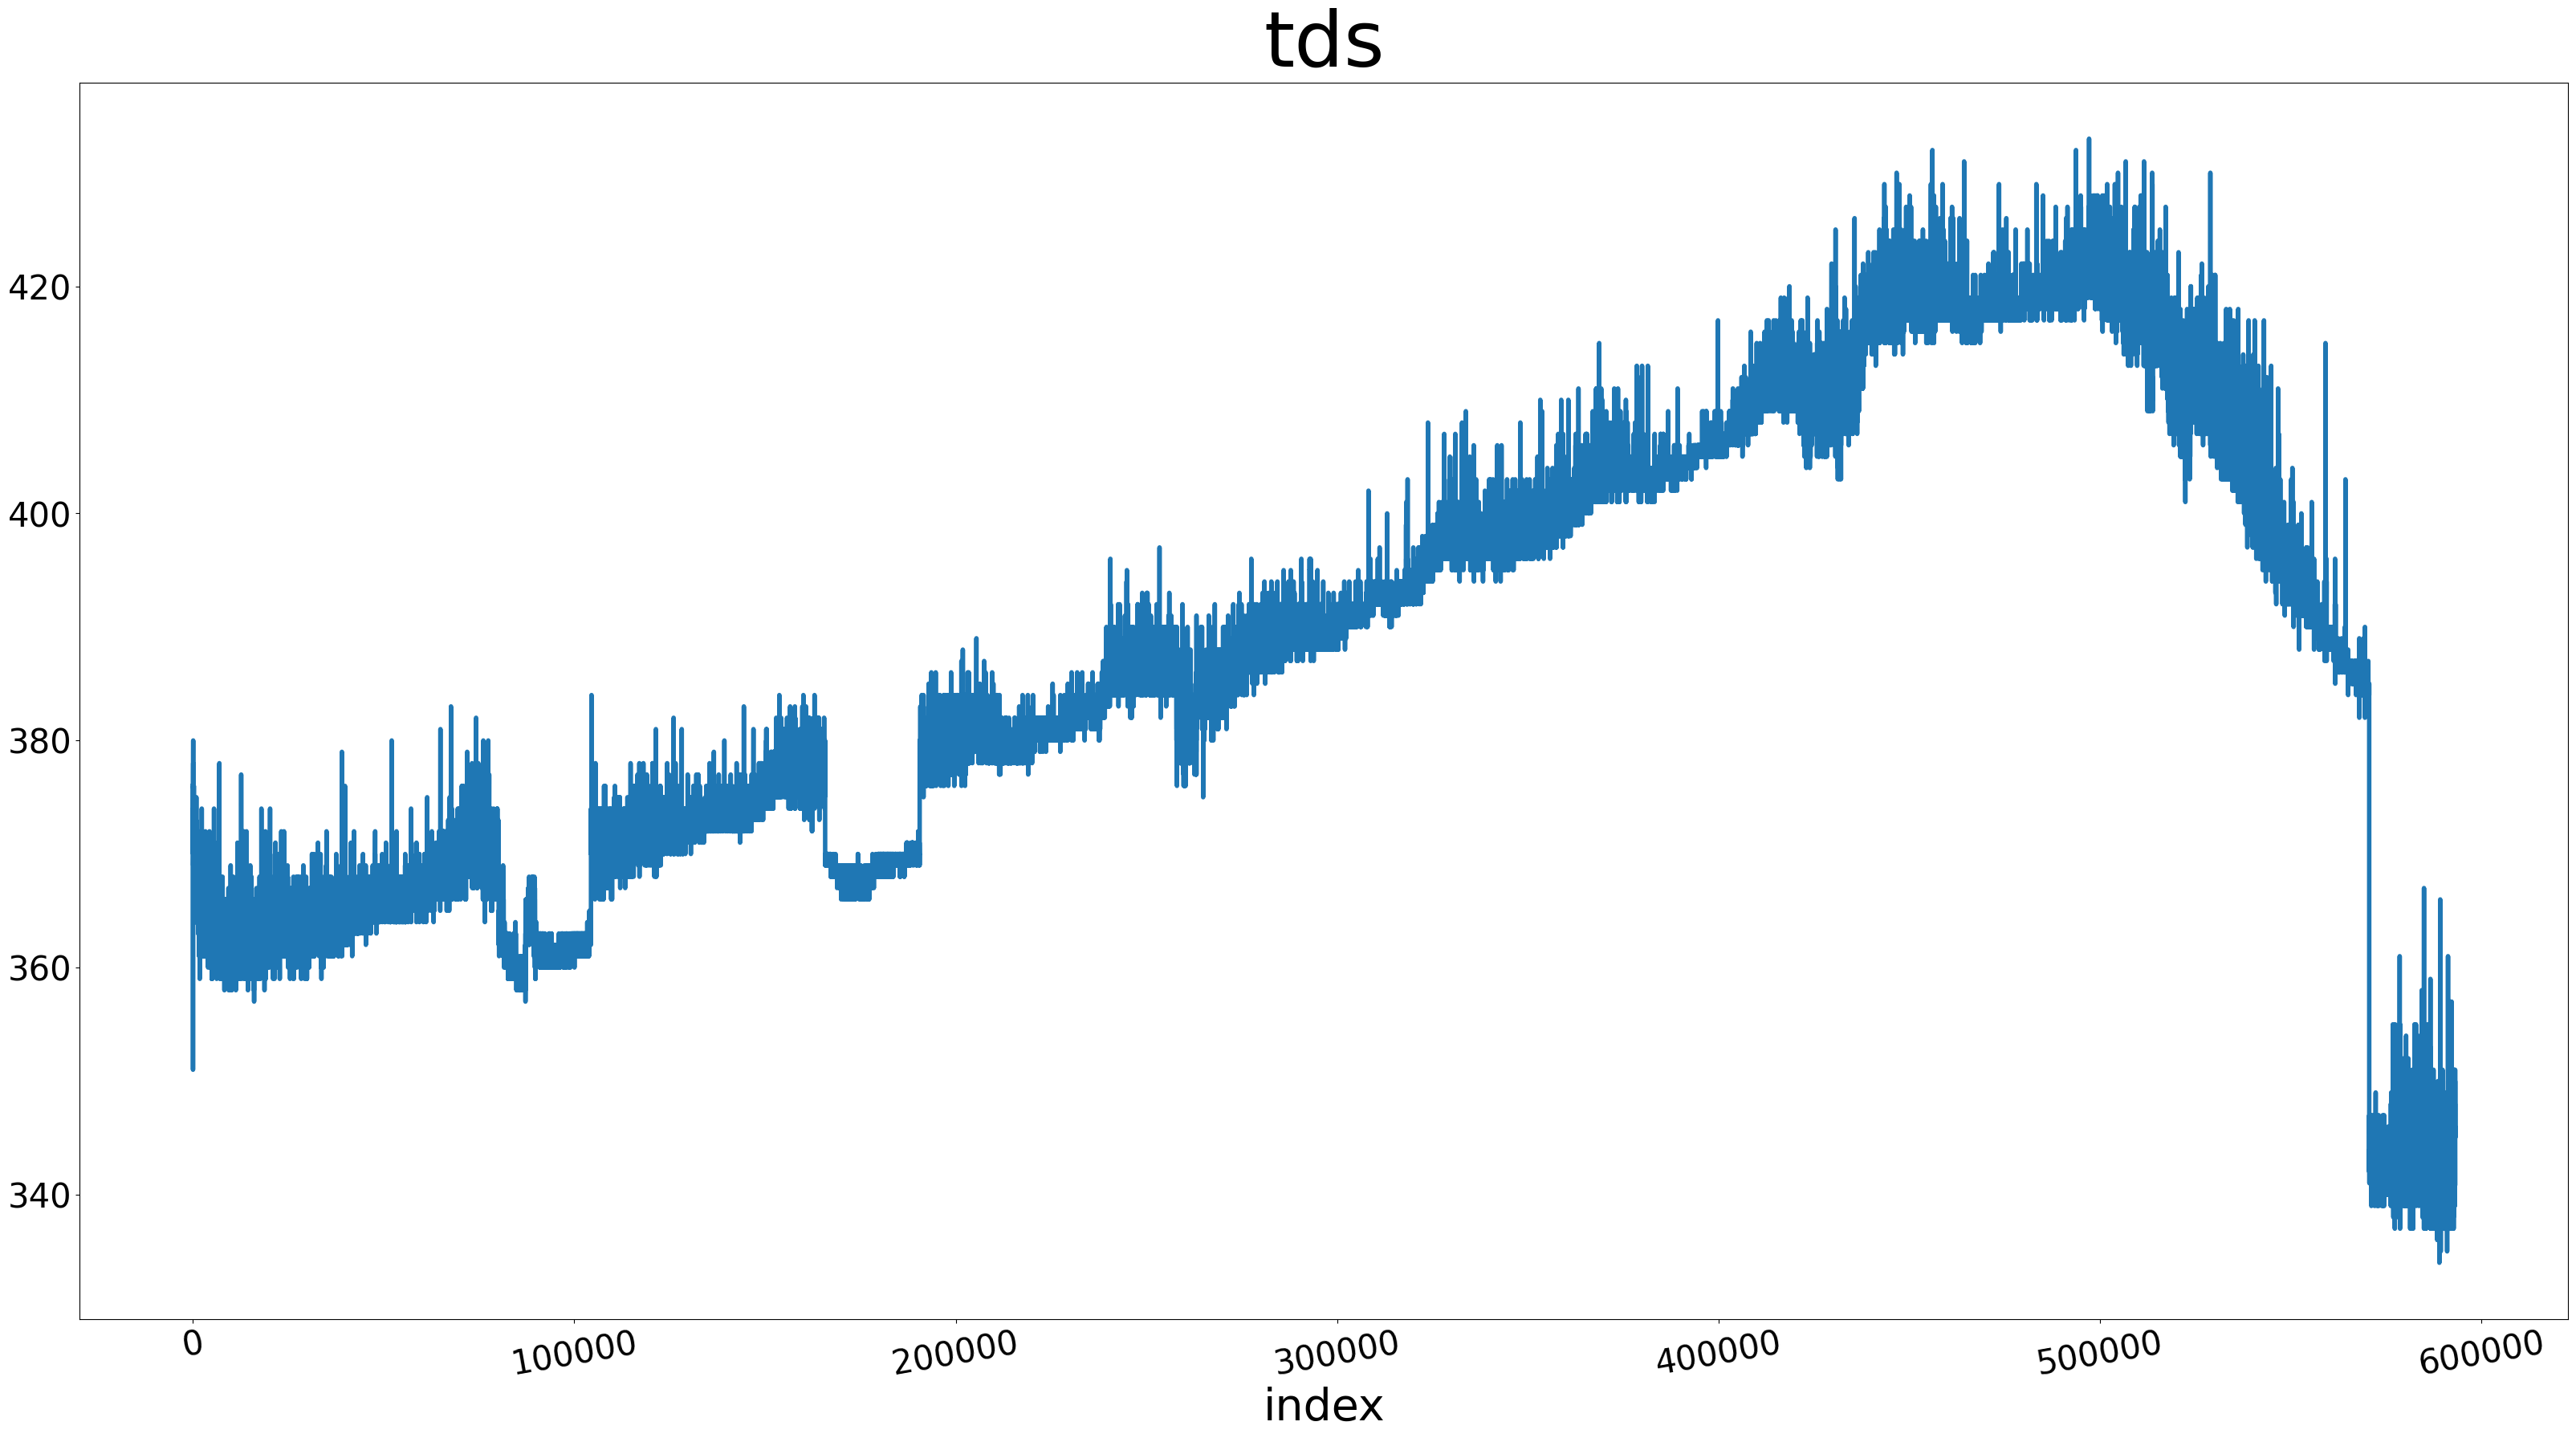

In [17]:
for column in df.drop('date',axis=1).columns:
    plt.figure(figsize=(40,20))
    plt.xlabel('index', fontsize=40)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)

    df[column].plot(linewidth=4)
    plt.title(column, fontsize=70)
    plt.tick_params(axis='x', rotation=10)
    plt.show()

#### Из графиков видно, что ph, do,o2 имеют сильный выброс в начале, который решено удалить. На графике tds аномалия в конце, которую тоже решено удалить.

## Выводим параметры с выбросами

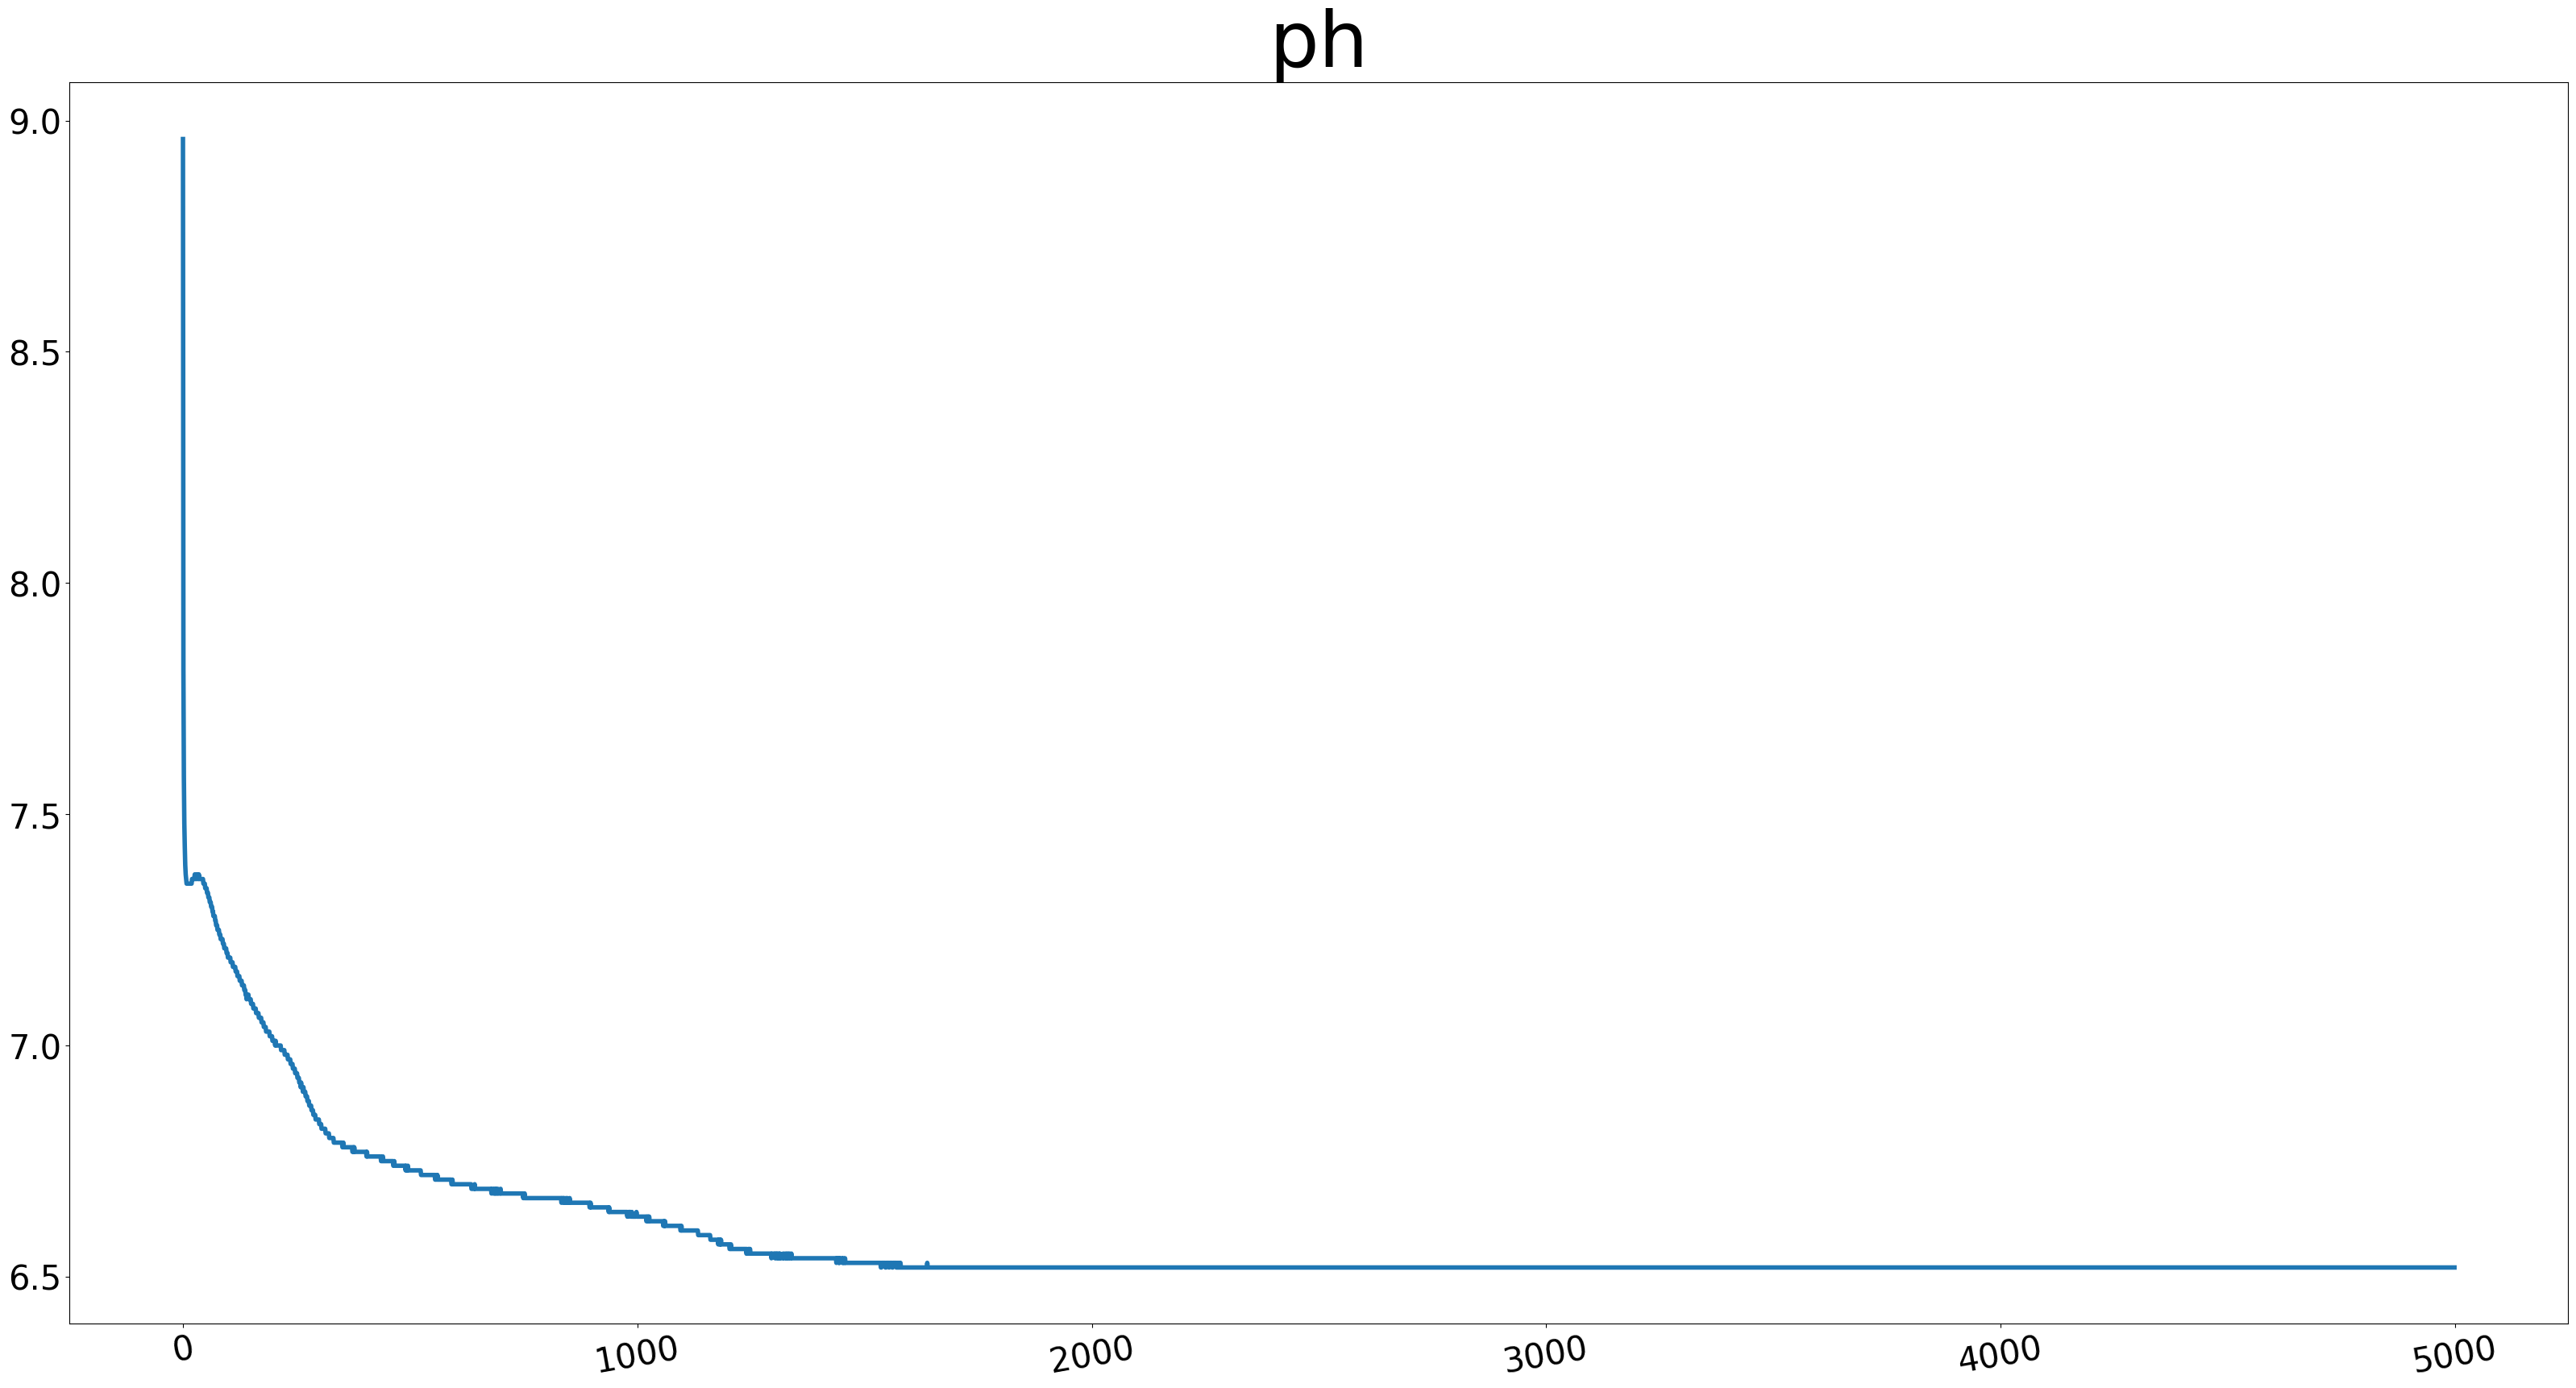

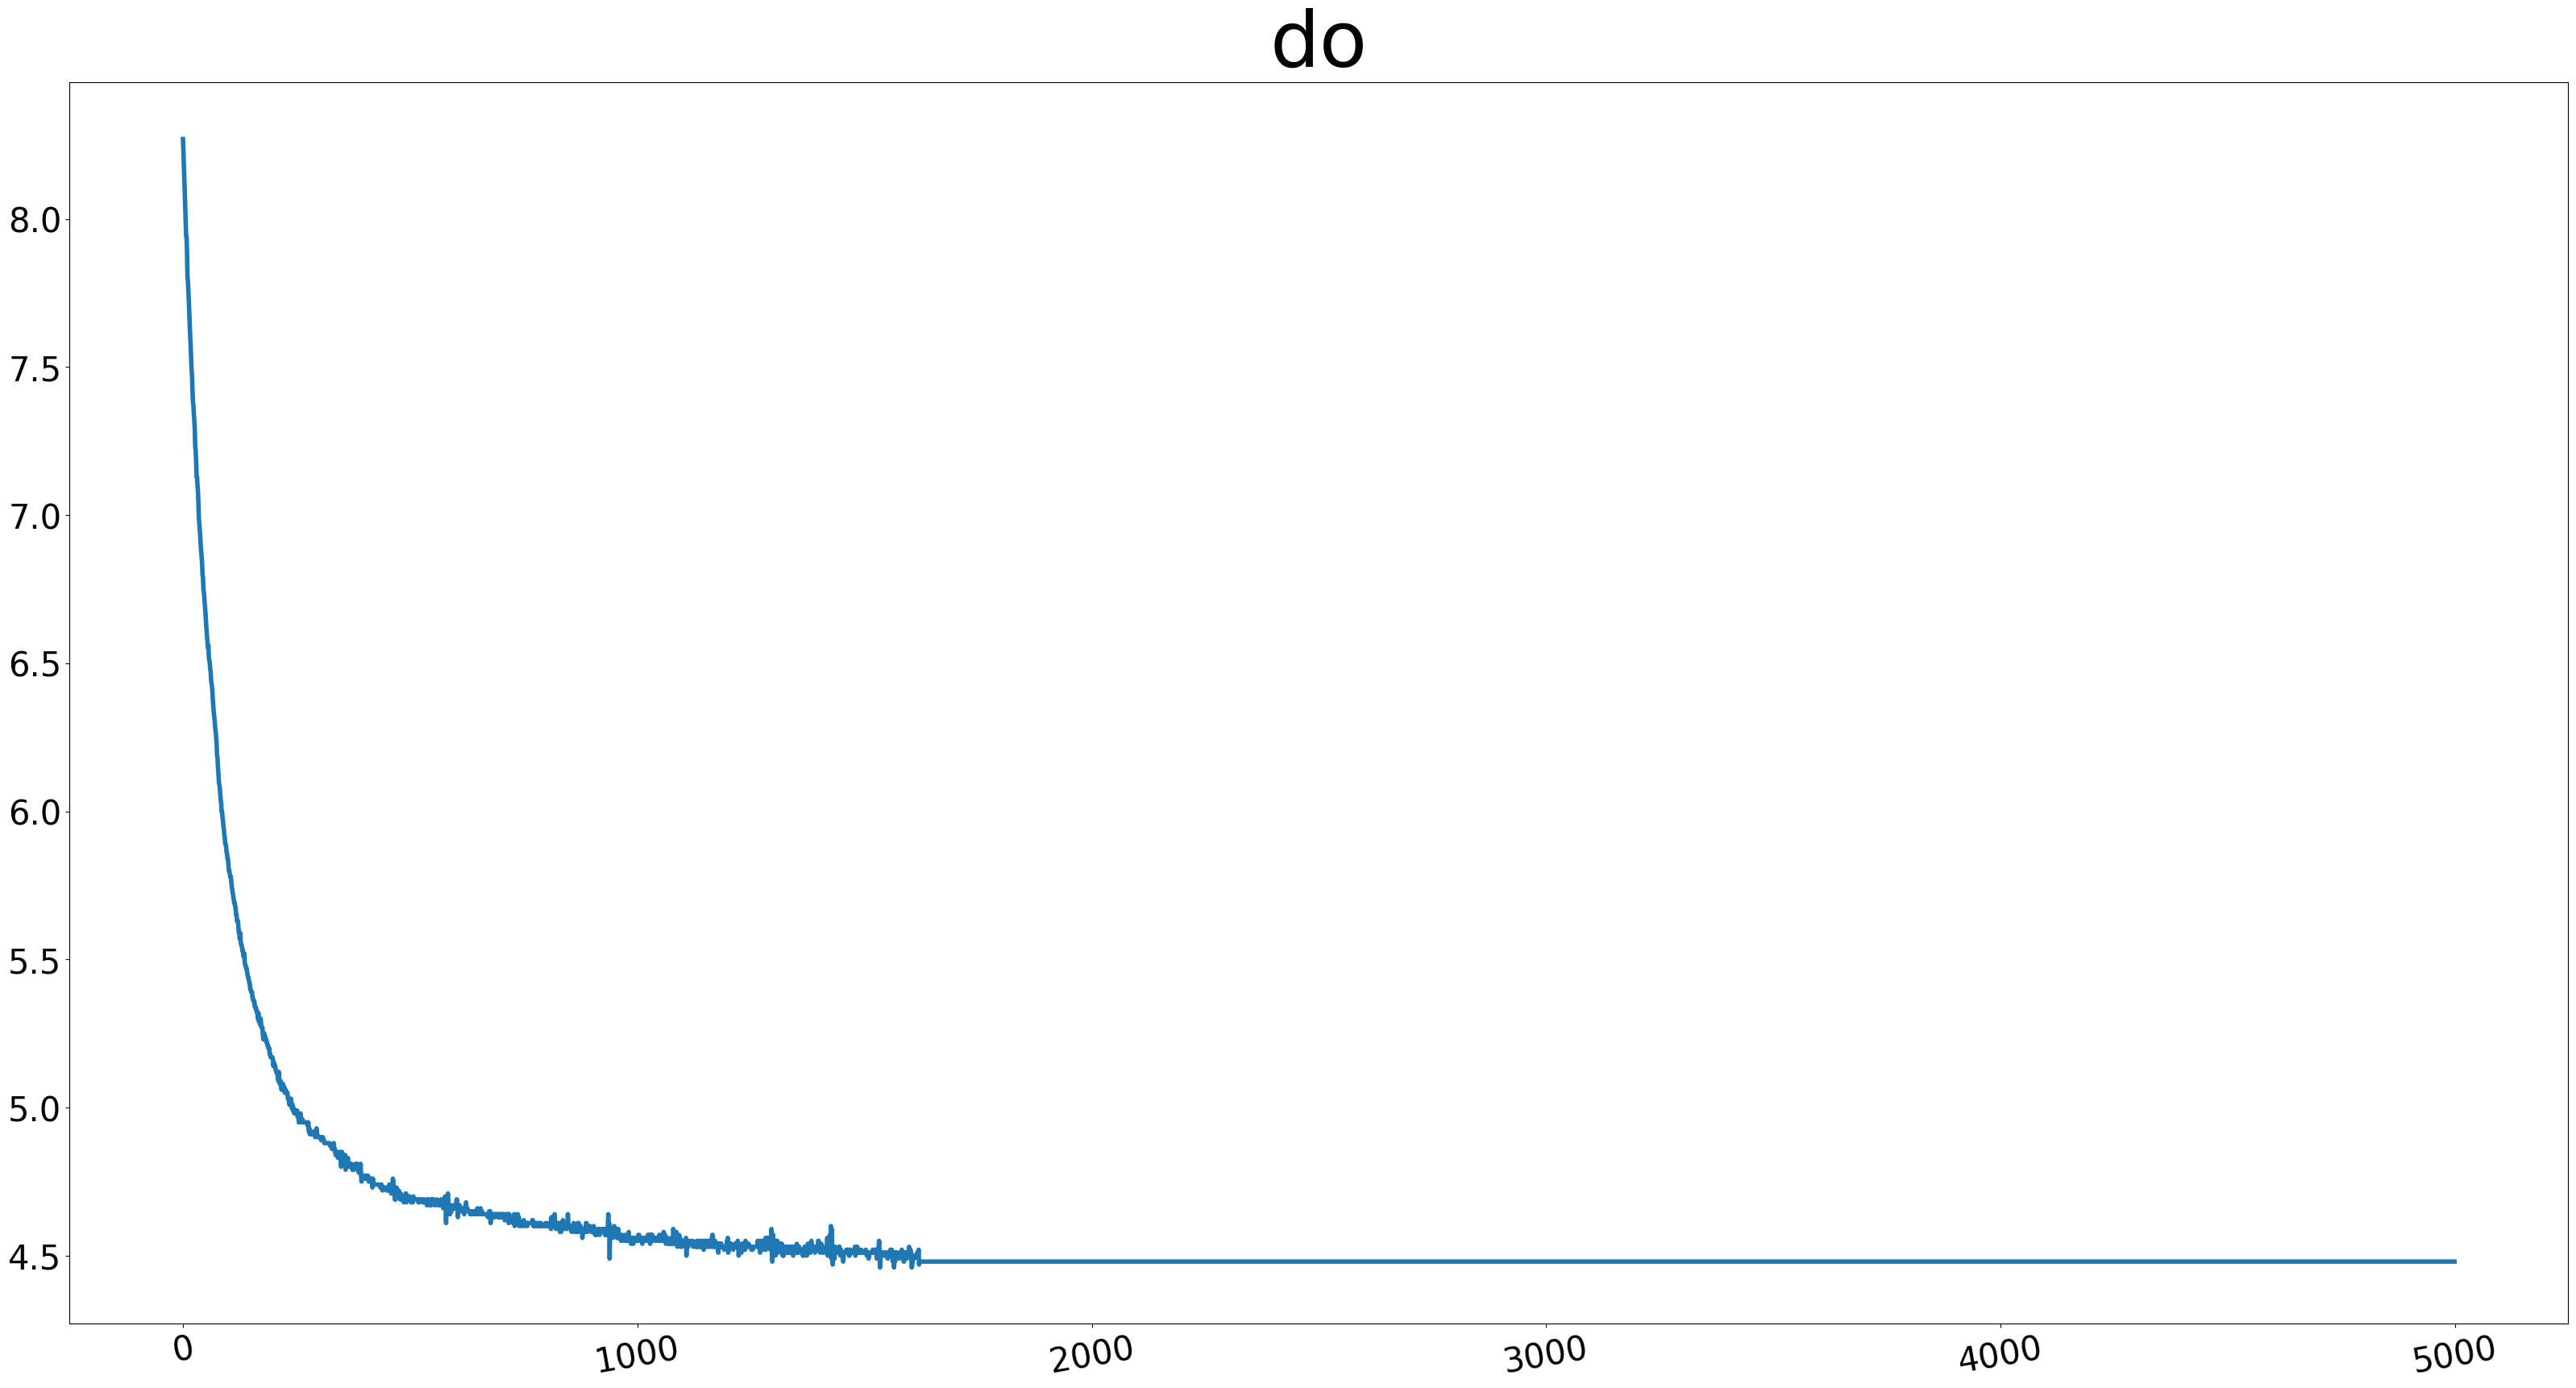

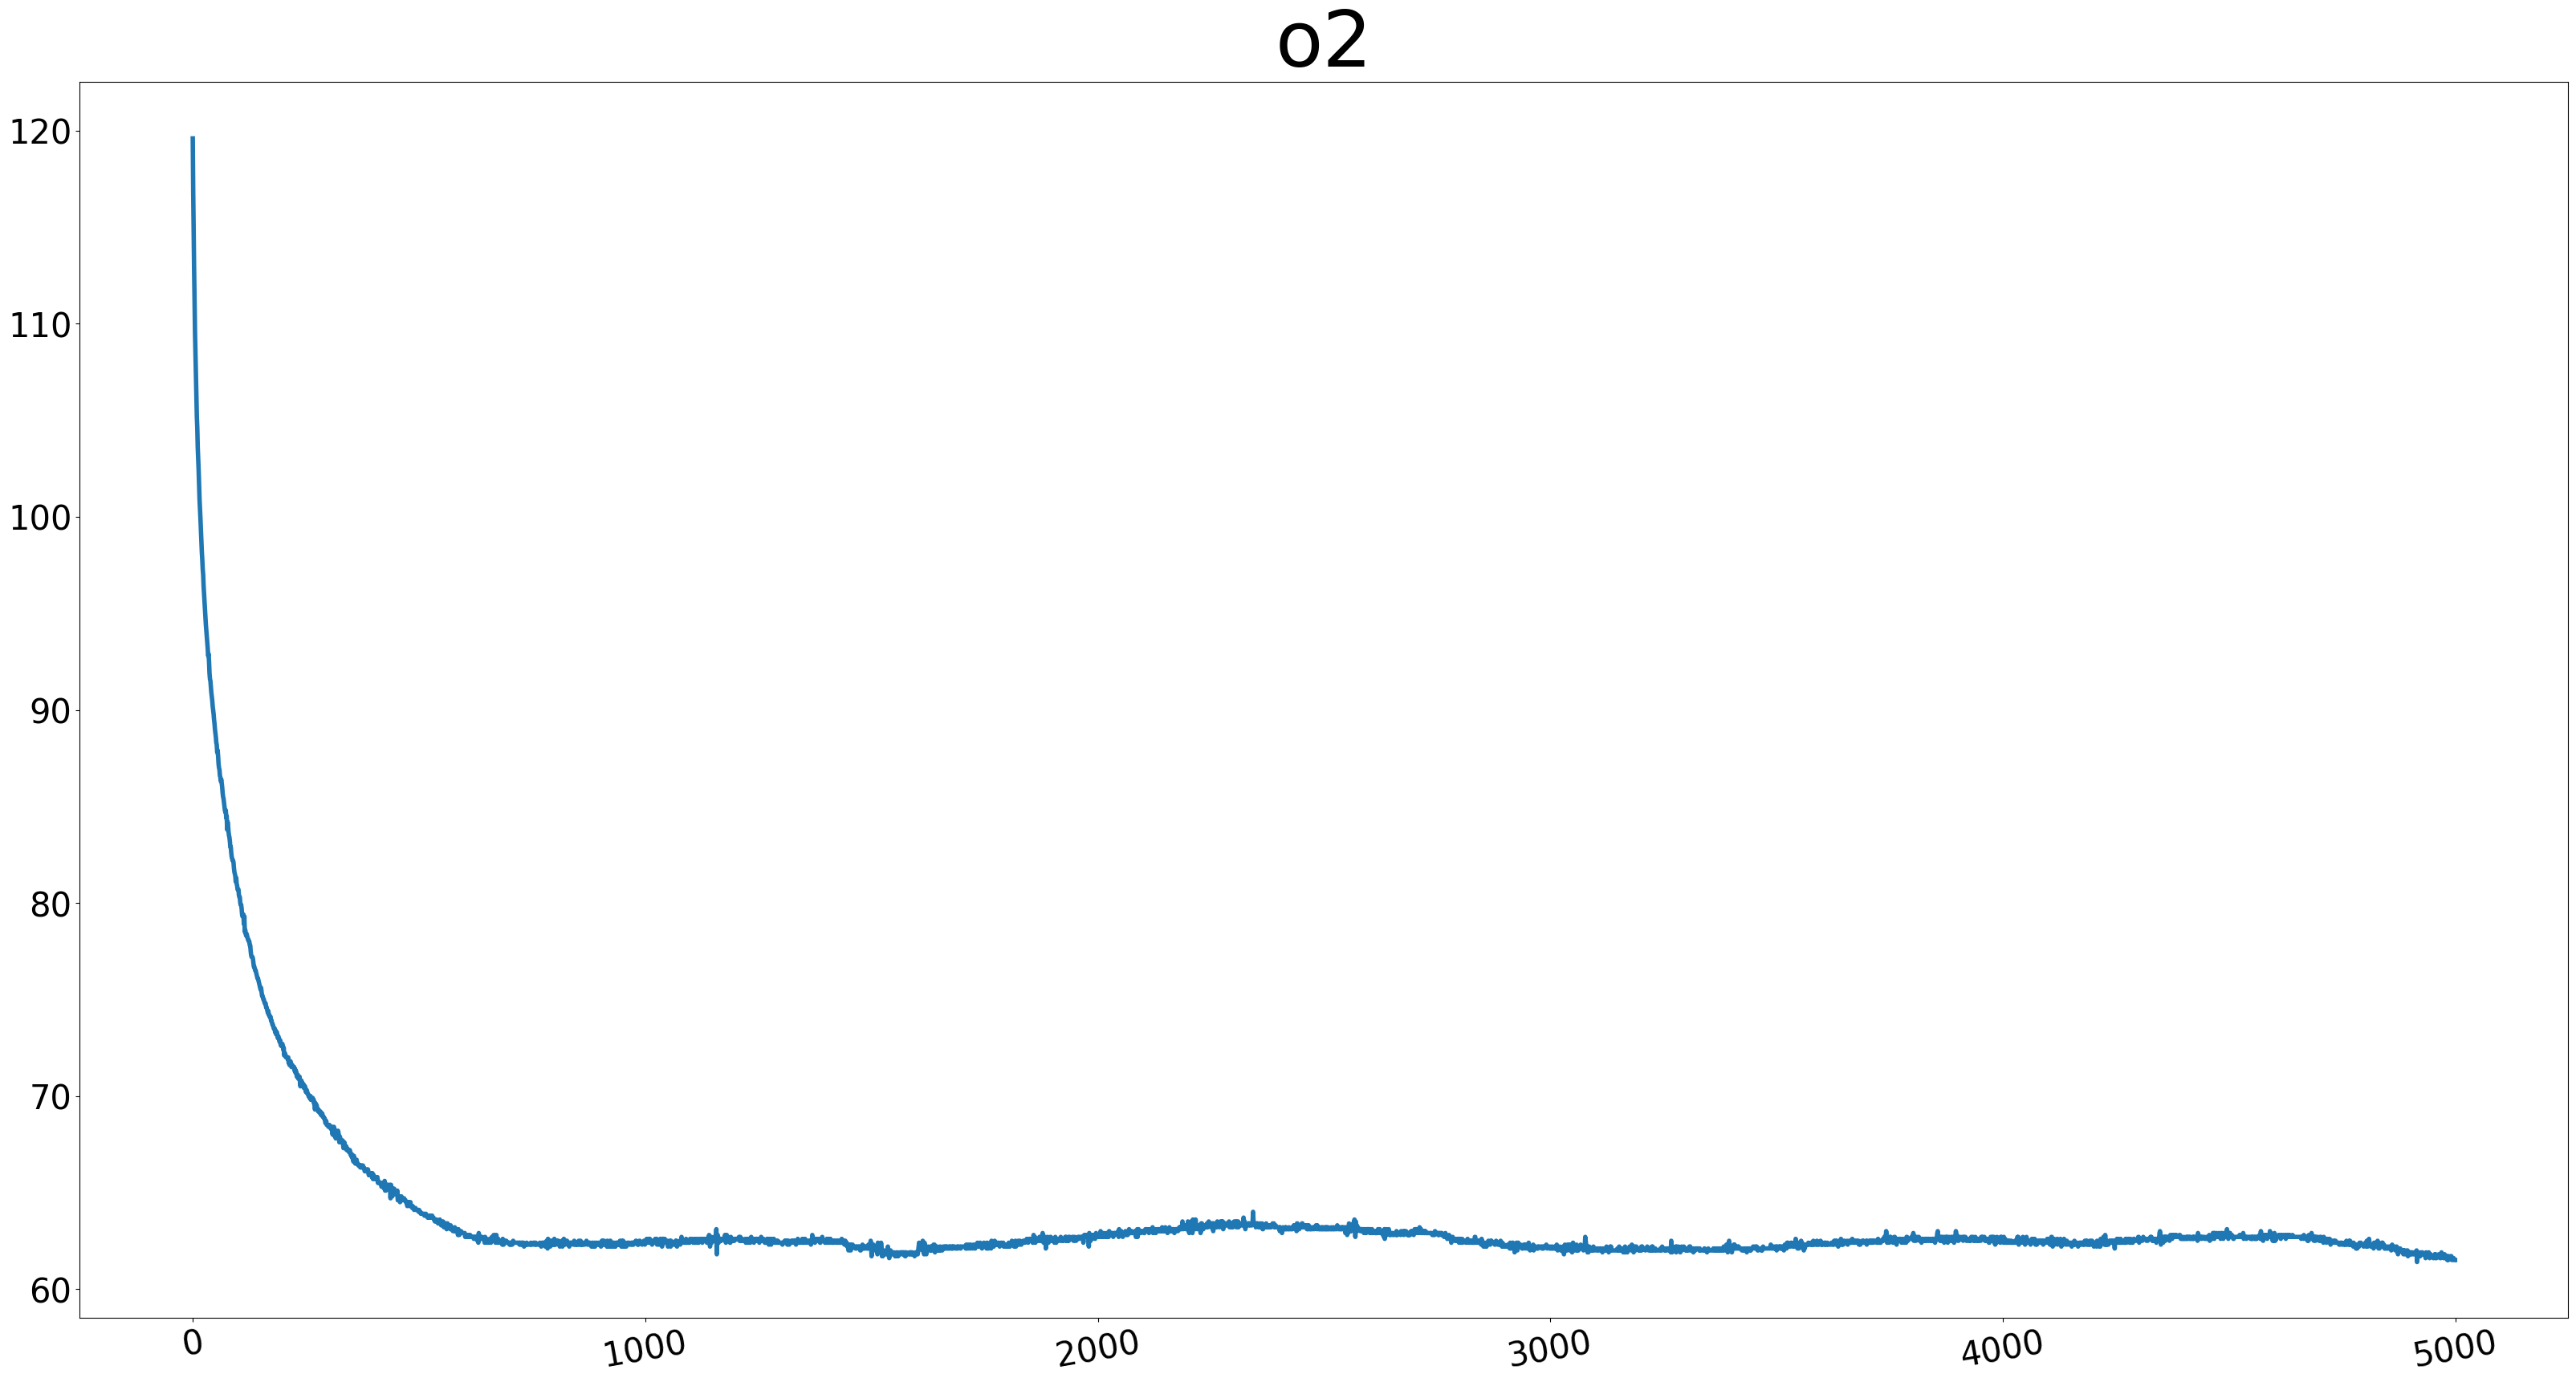

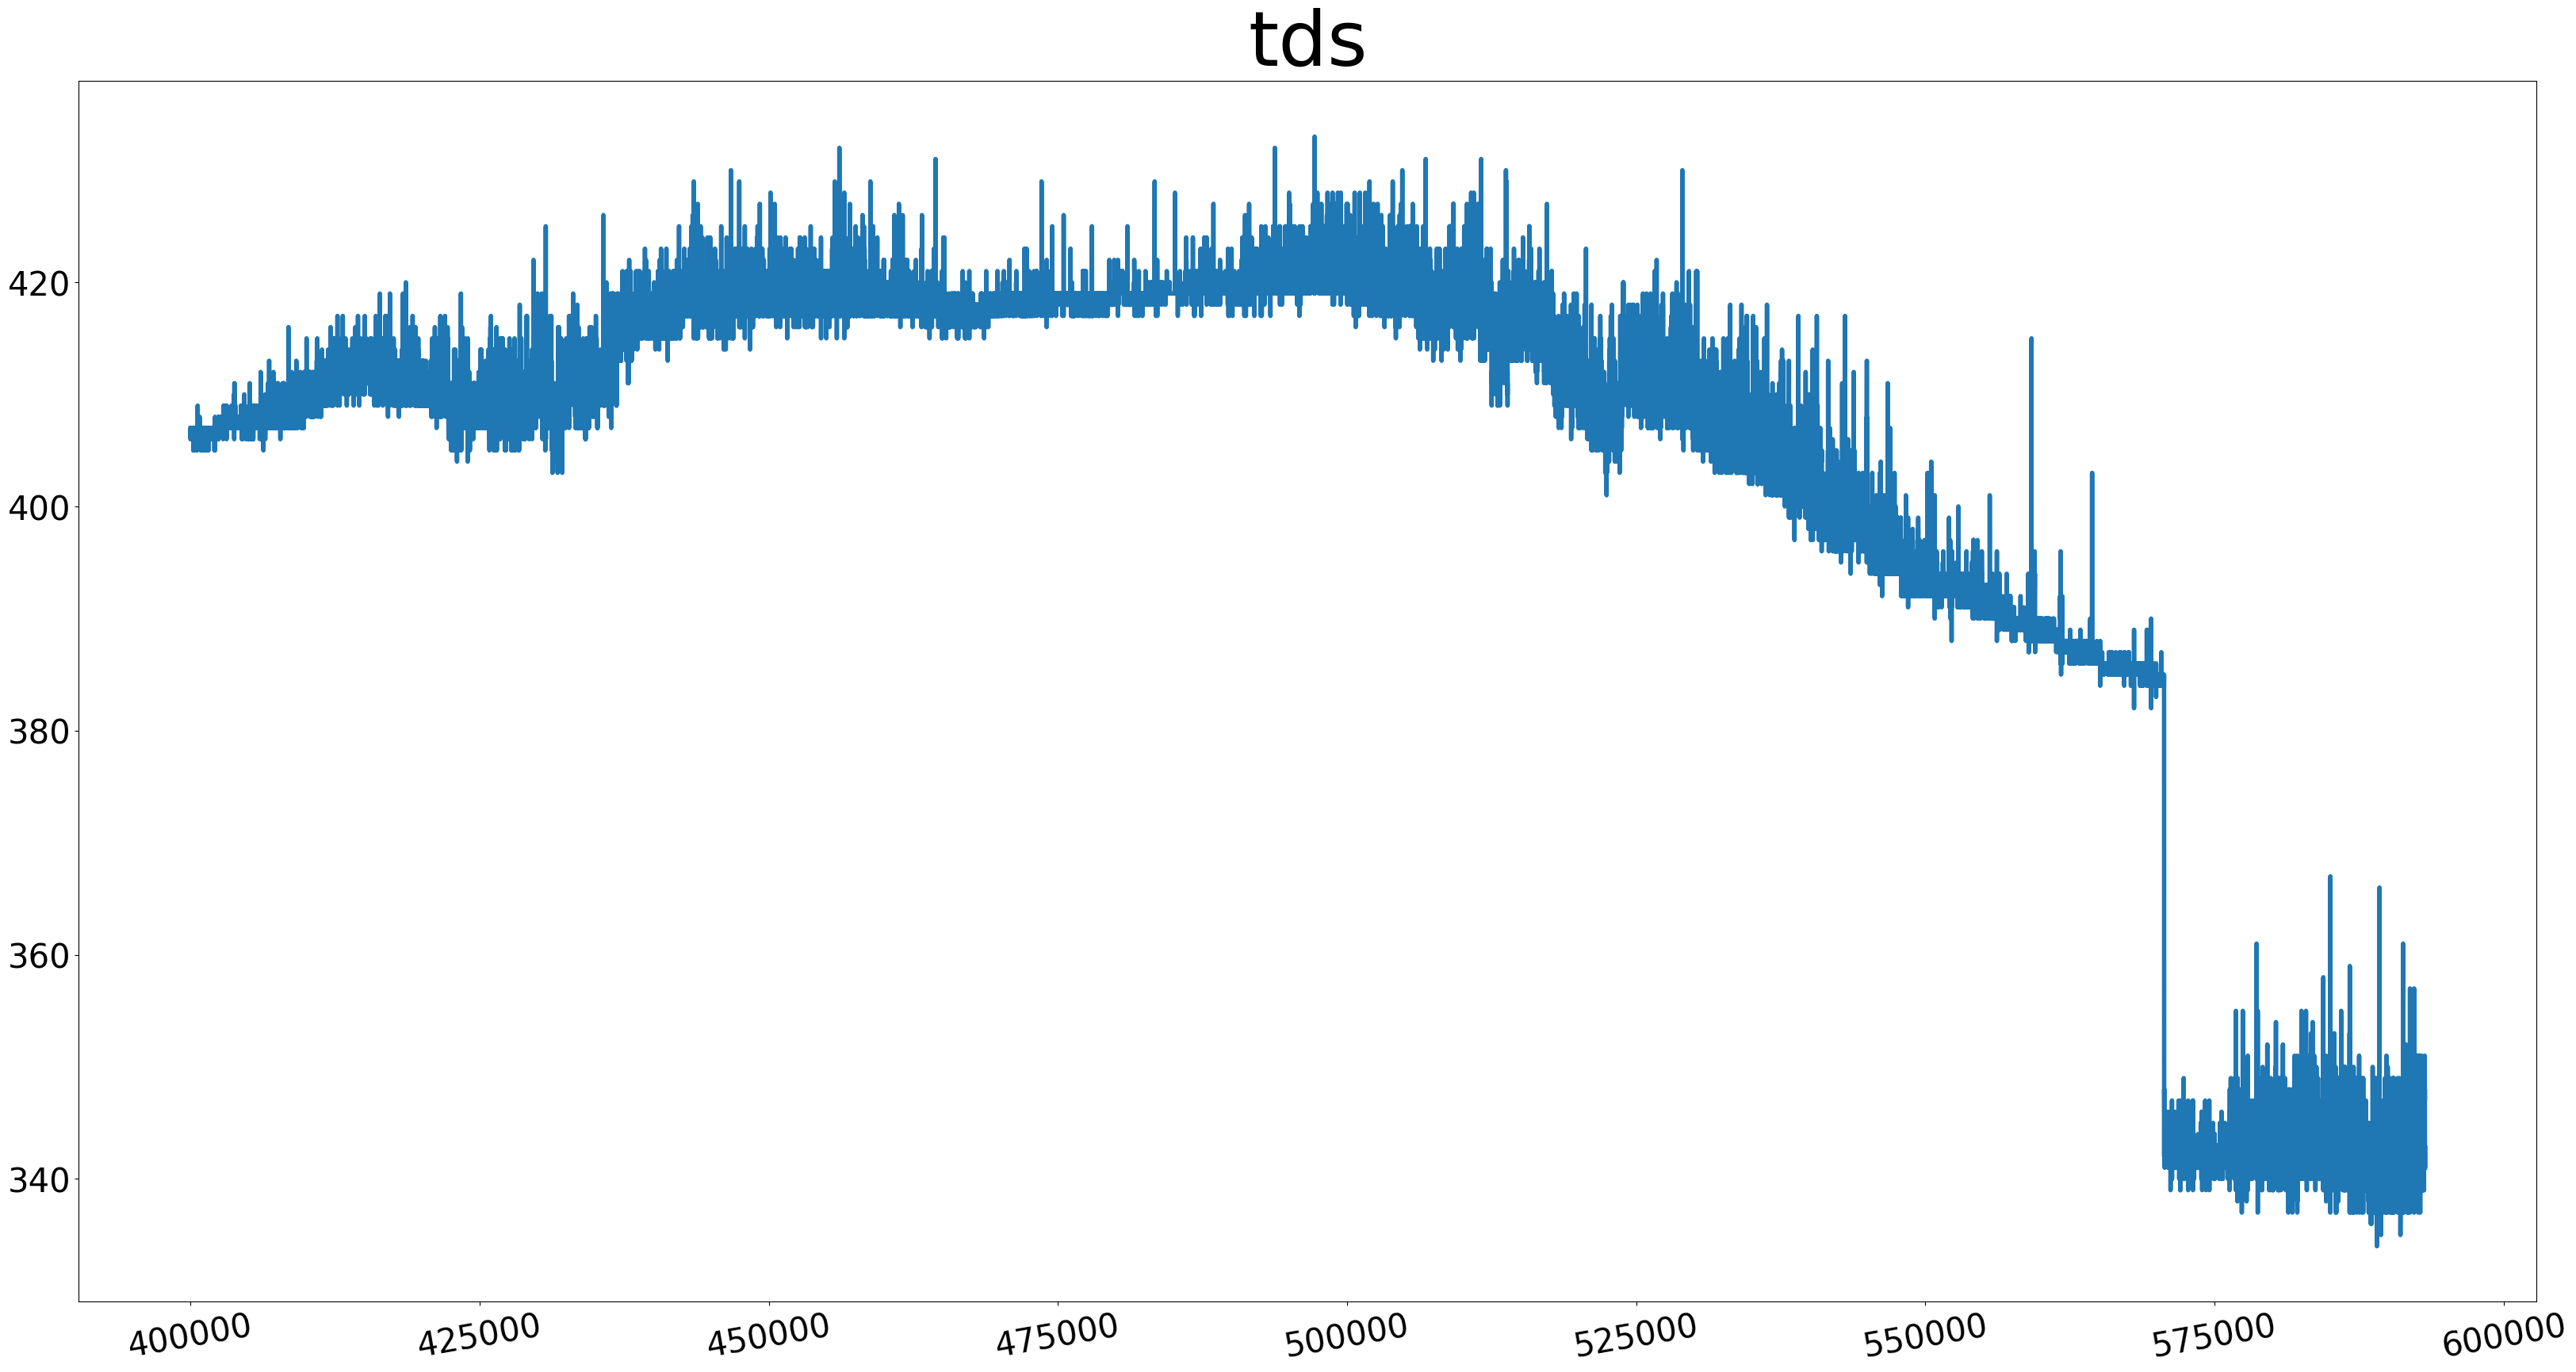

In [19]:
for column in ['ph','do','o2']:
    plt.figure(figsize=(40,20))
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)

    df[0:5000][column].plot(linewidth=4)
    plt.title(column, fontsize=70)
    plt.tick_params(axis='x', rotation=10)
    plt.show()

plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

df[400000:]['tds'].plot(linewidth=4)
plt.title('tds', fontsize=70)
plt.tick_params(axis='x', rotation=10)
plt.show()

#### На графиках видно, что do и ph после выброса становятся костантой, поэтому принято решение не использовать их для анализа. Выброс параметра o2 заканчивается на индексе 600. Аномалия на параметре tds начинается с индекса 500000, поэтому для исследования будут использоваться данные до этого момента времени.

## Удаляем параметры, избавляемся от выбросов и снова выводим графики

In [32]:
df = df.drop(['do','ph'],axis=1).iloc[600:500000].reset_index(drop=True)
df.head()

,cond,o2,orp,tds,date
0,359.0,62.9,474.0,369,2022-10-20 00:10:05
1,353.0,62.9,473.9,369,2022-10-20 00:10:06
2,345.0,62.7,473.9,370,2022-10-20 00:10:07
3,342.0,62.8,474.0,370,2022-10-20 00:10:08
4,339.0,62.8,474.1,368,2022-10-20 00:10:09


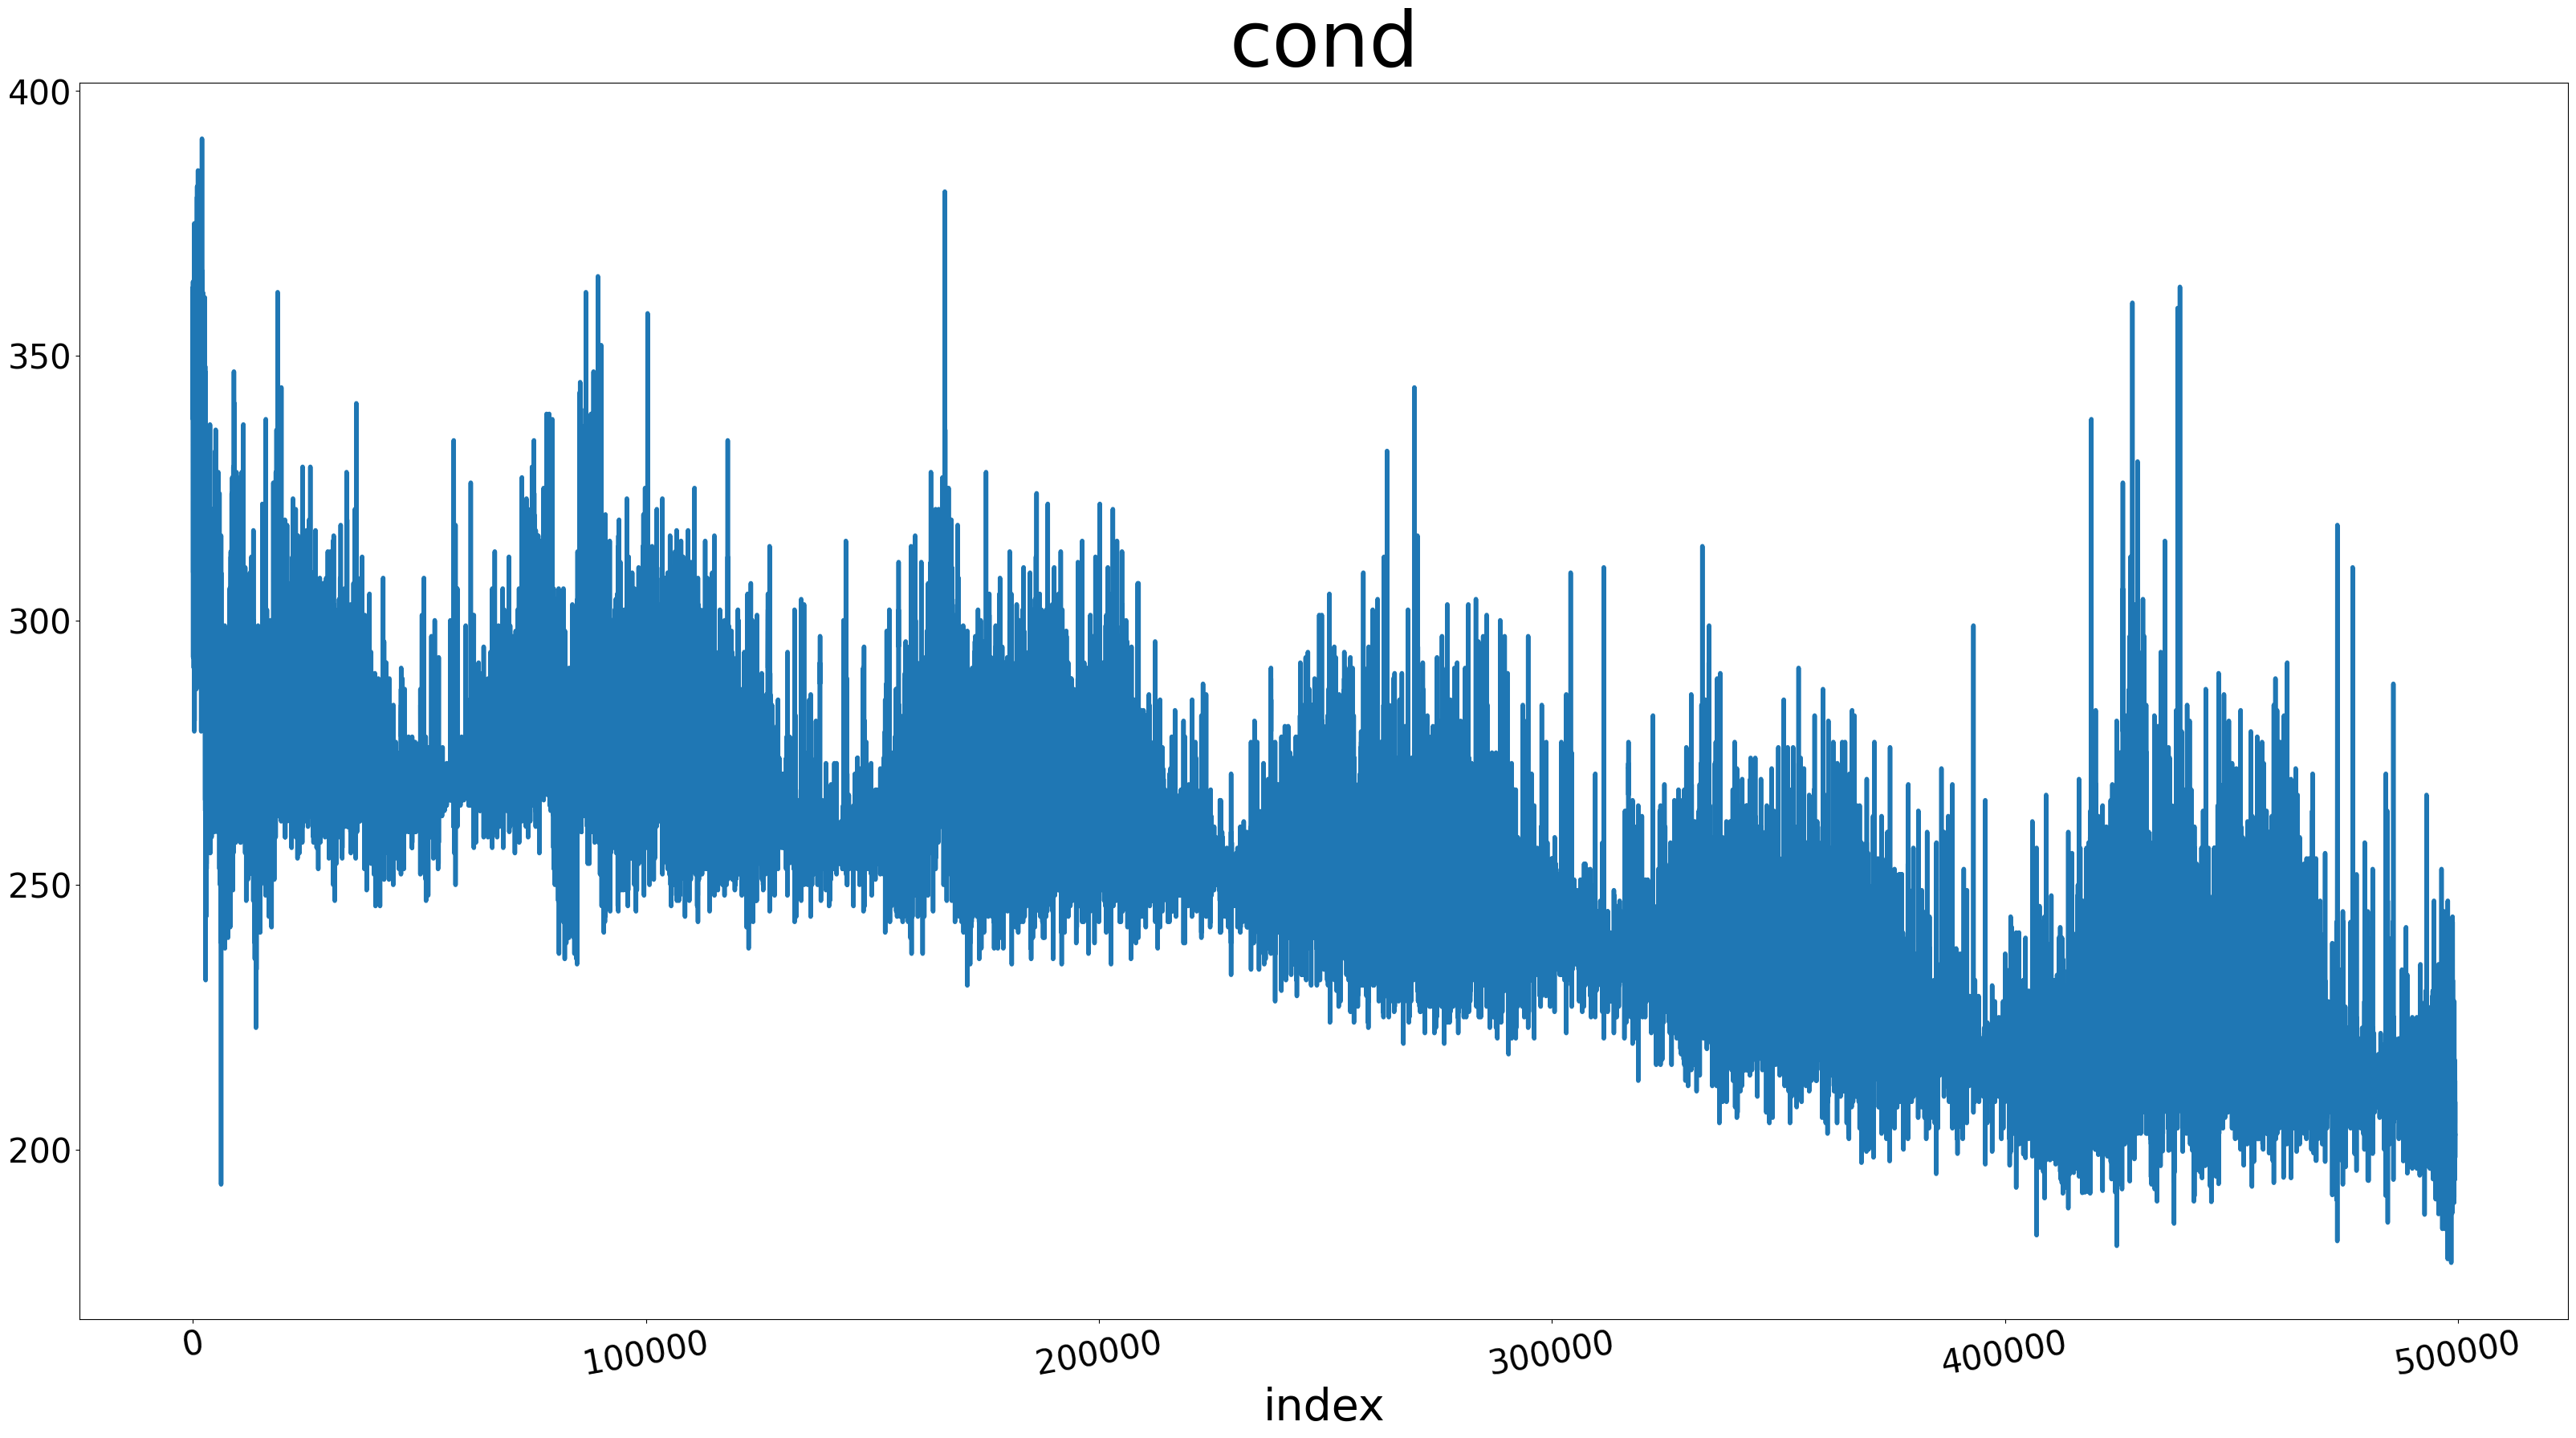

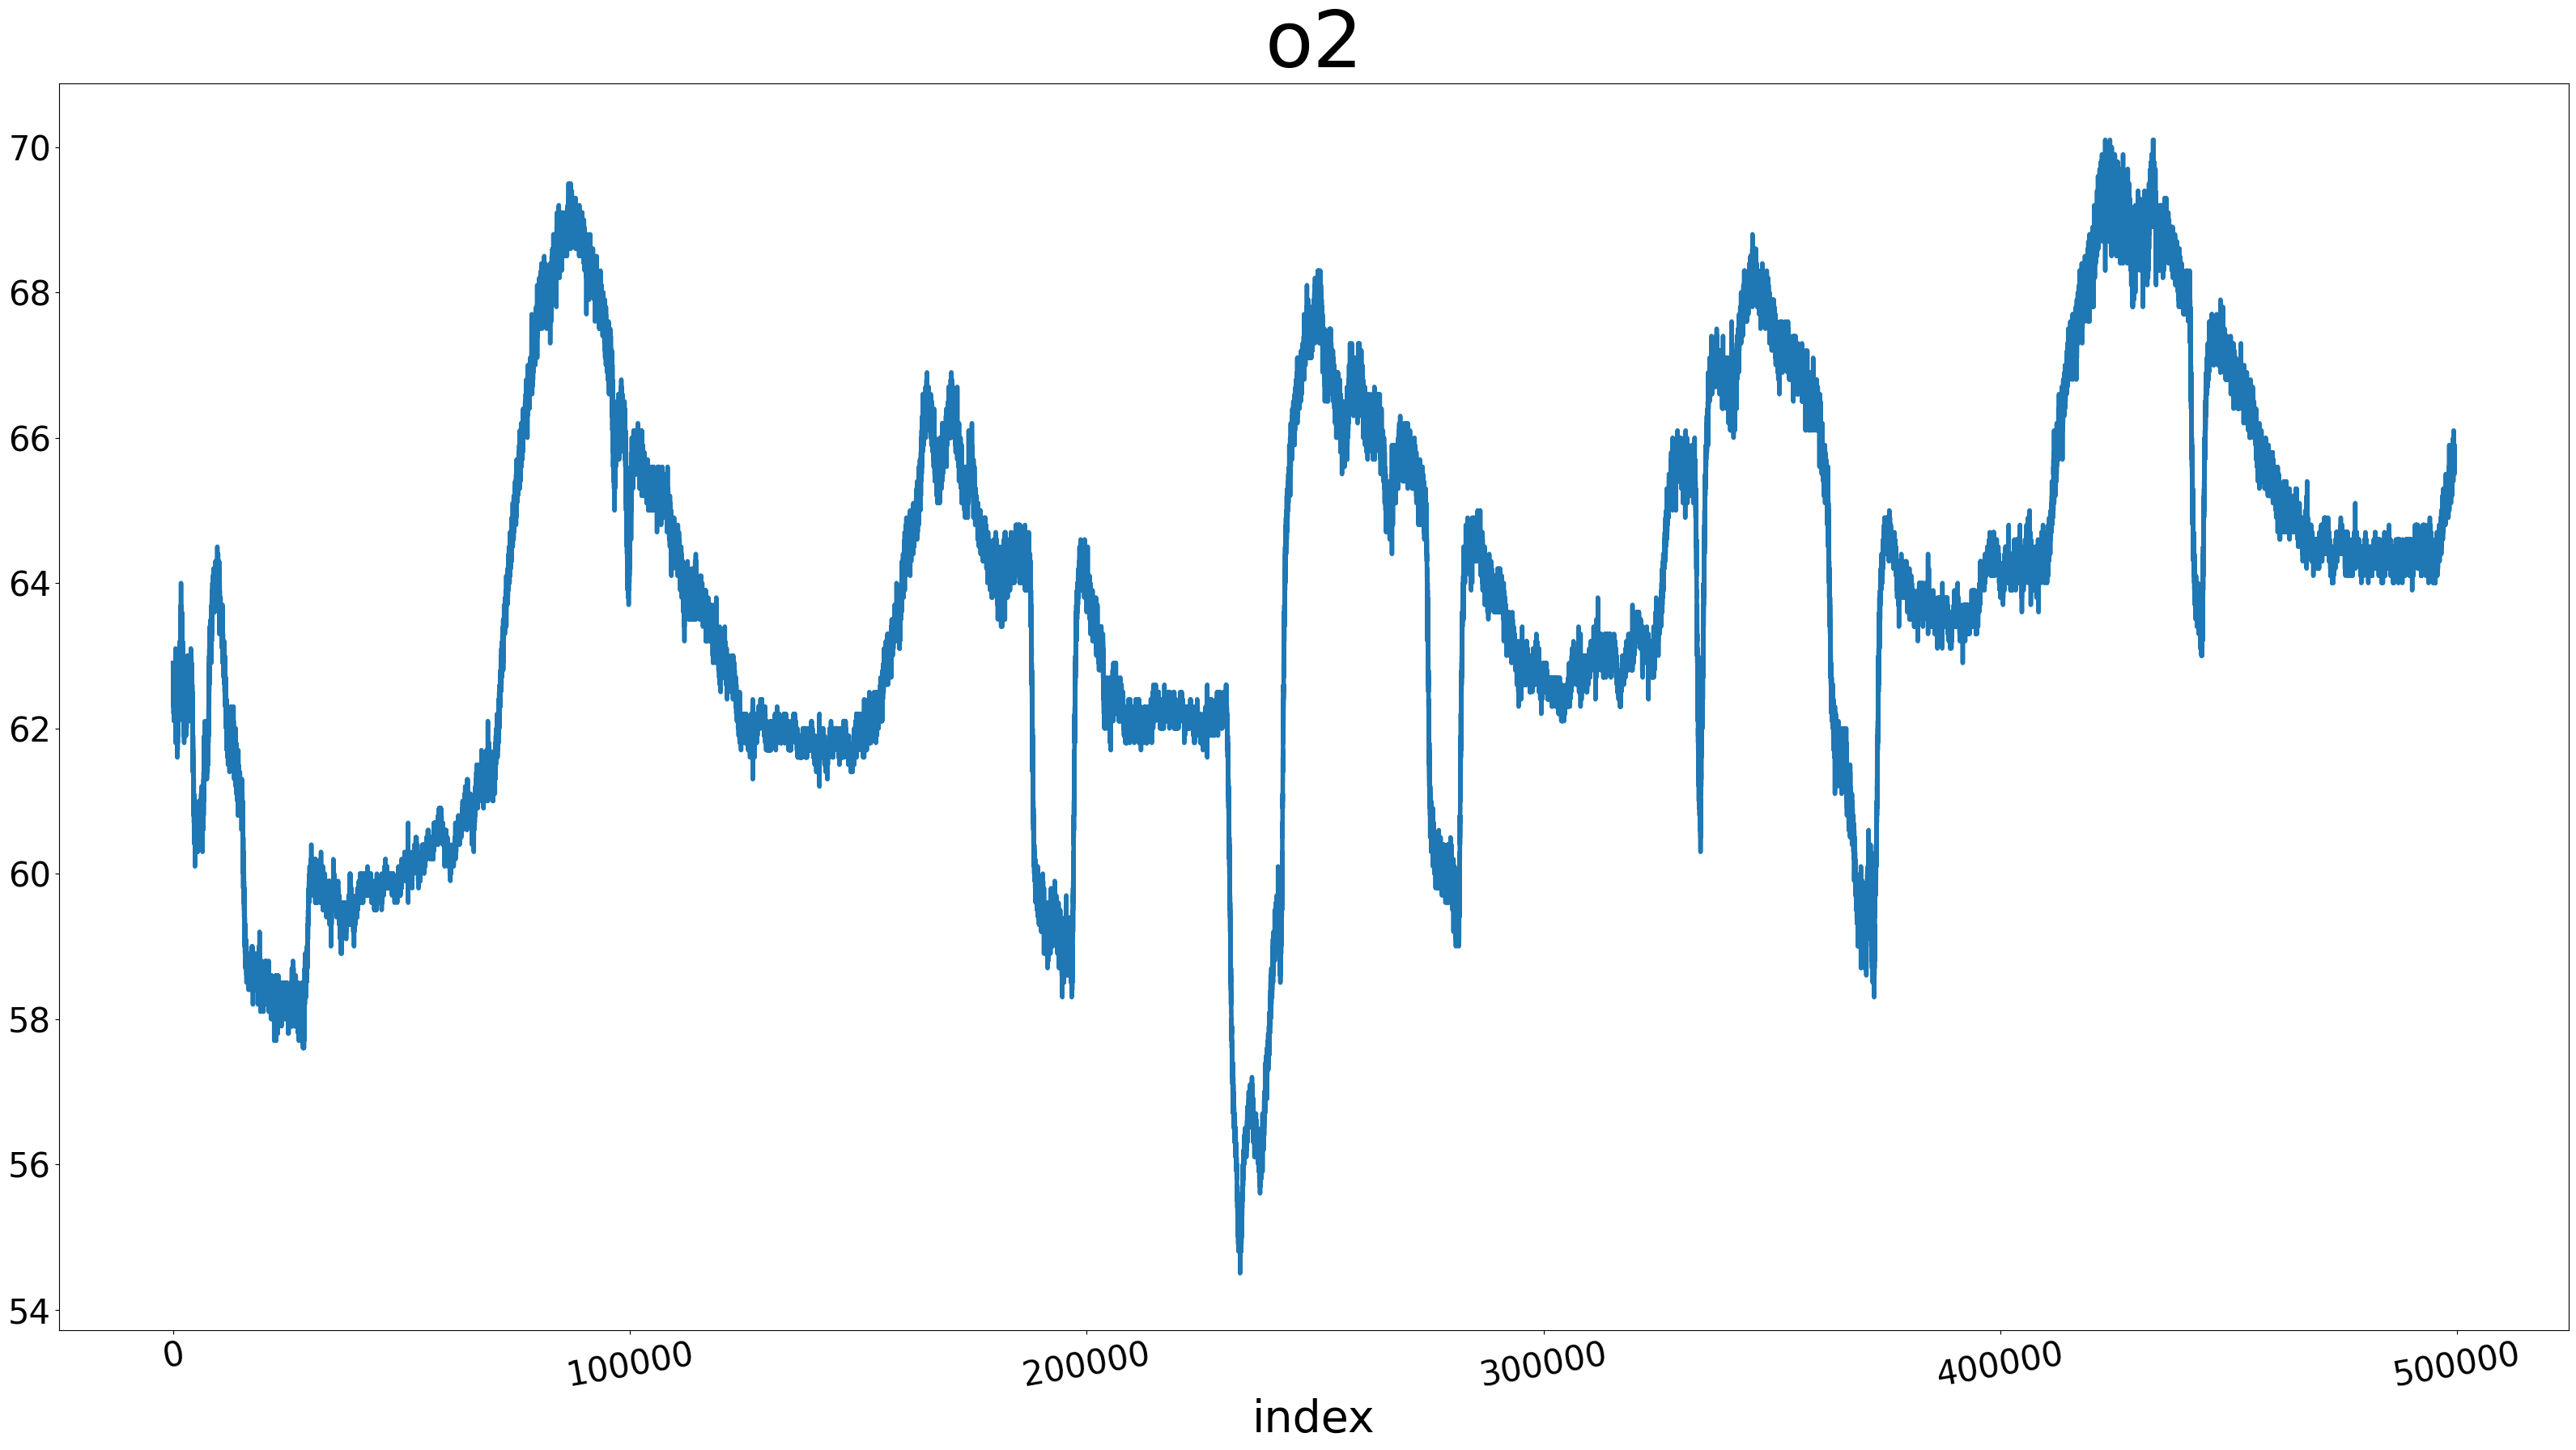

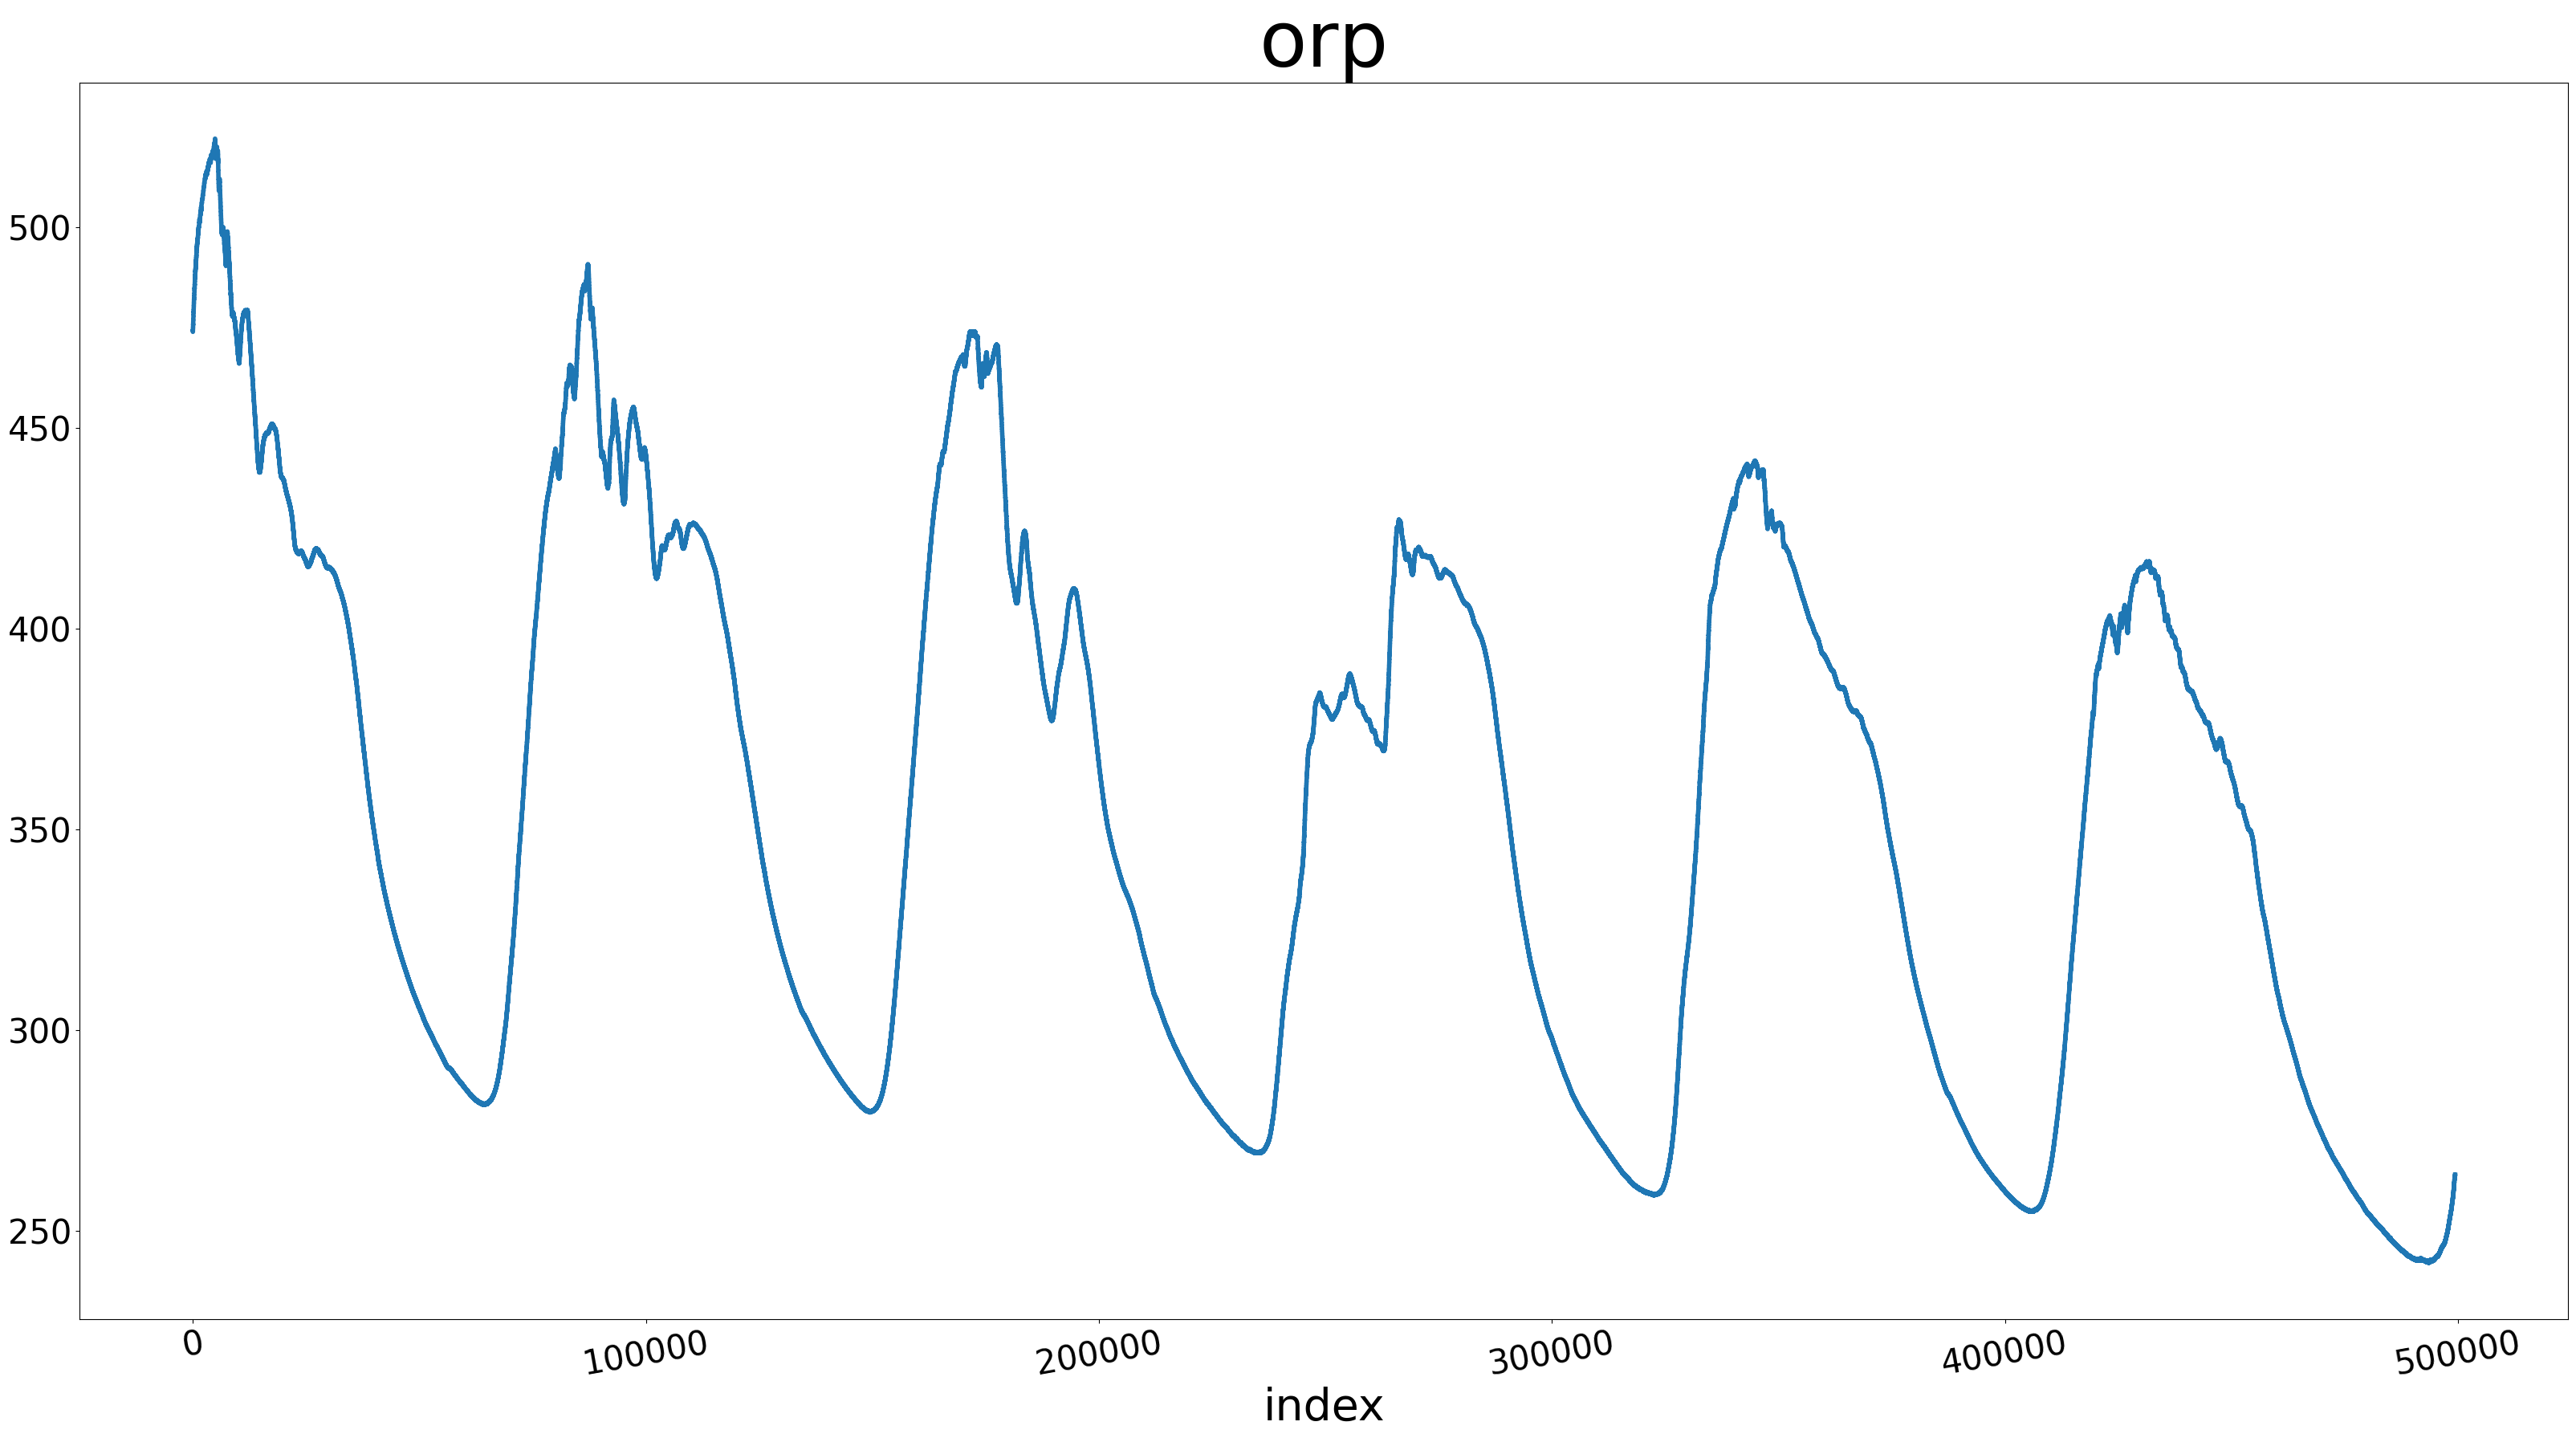

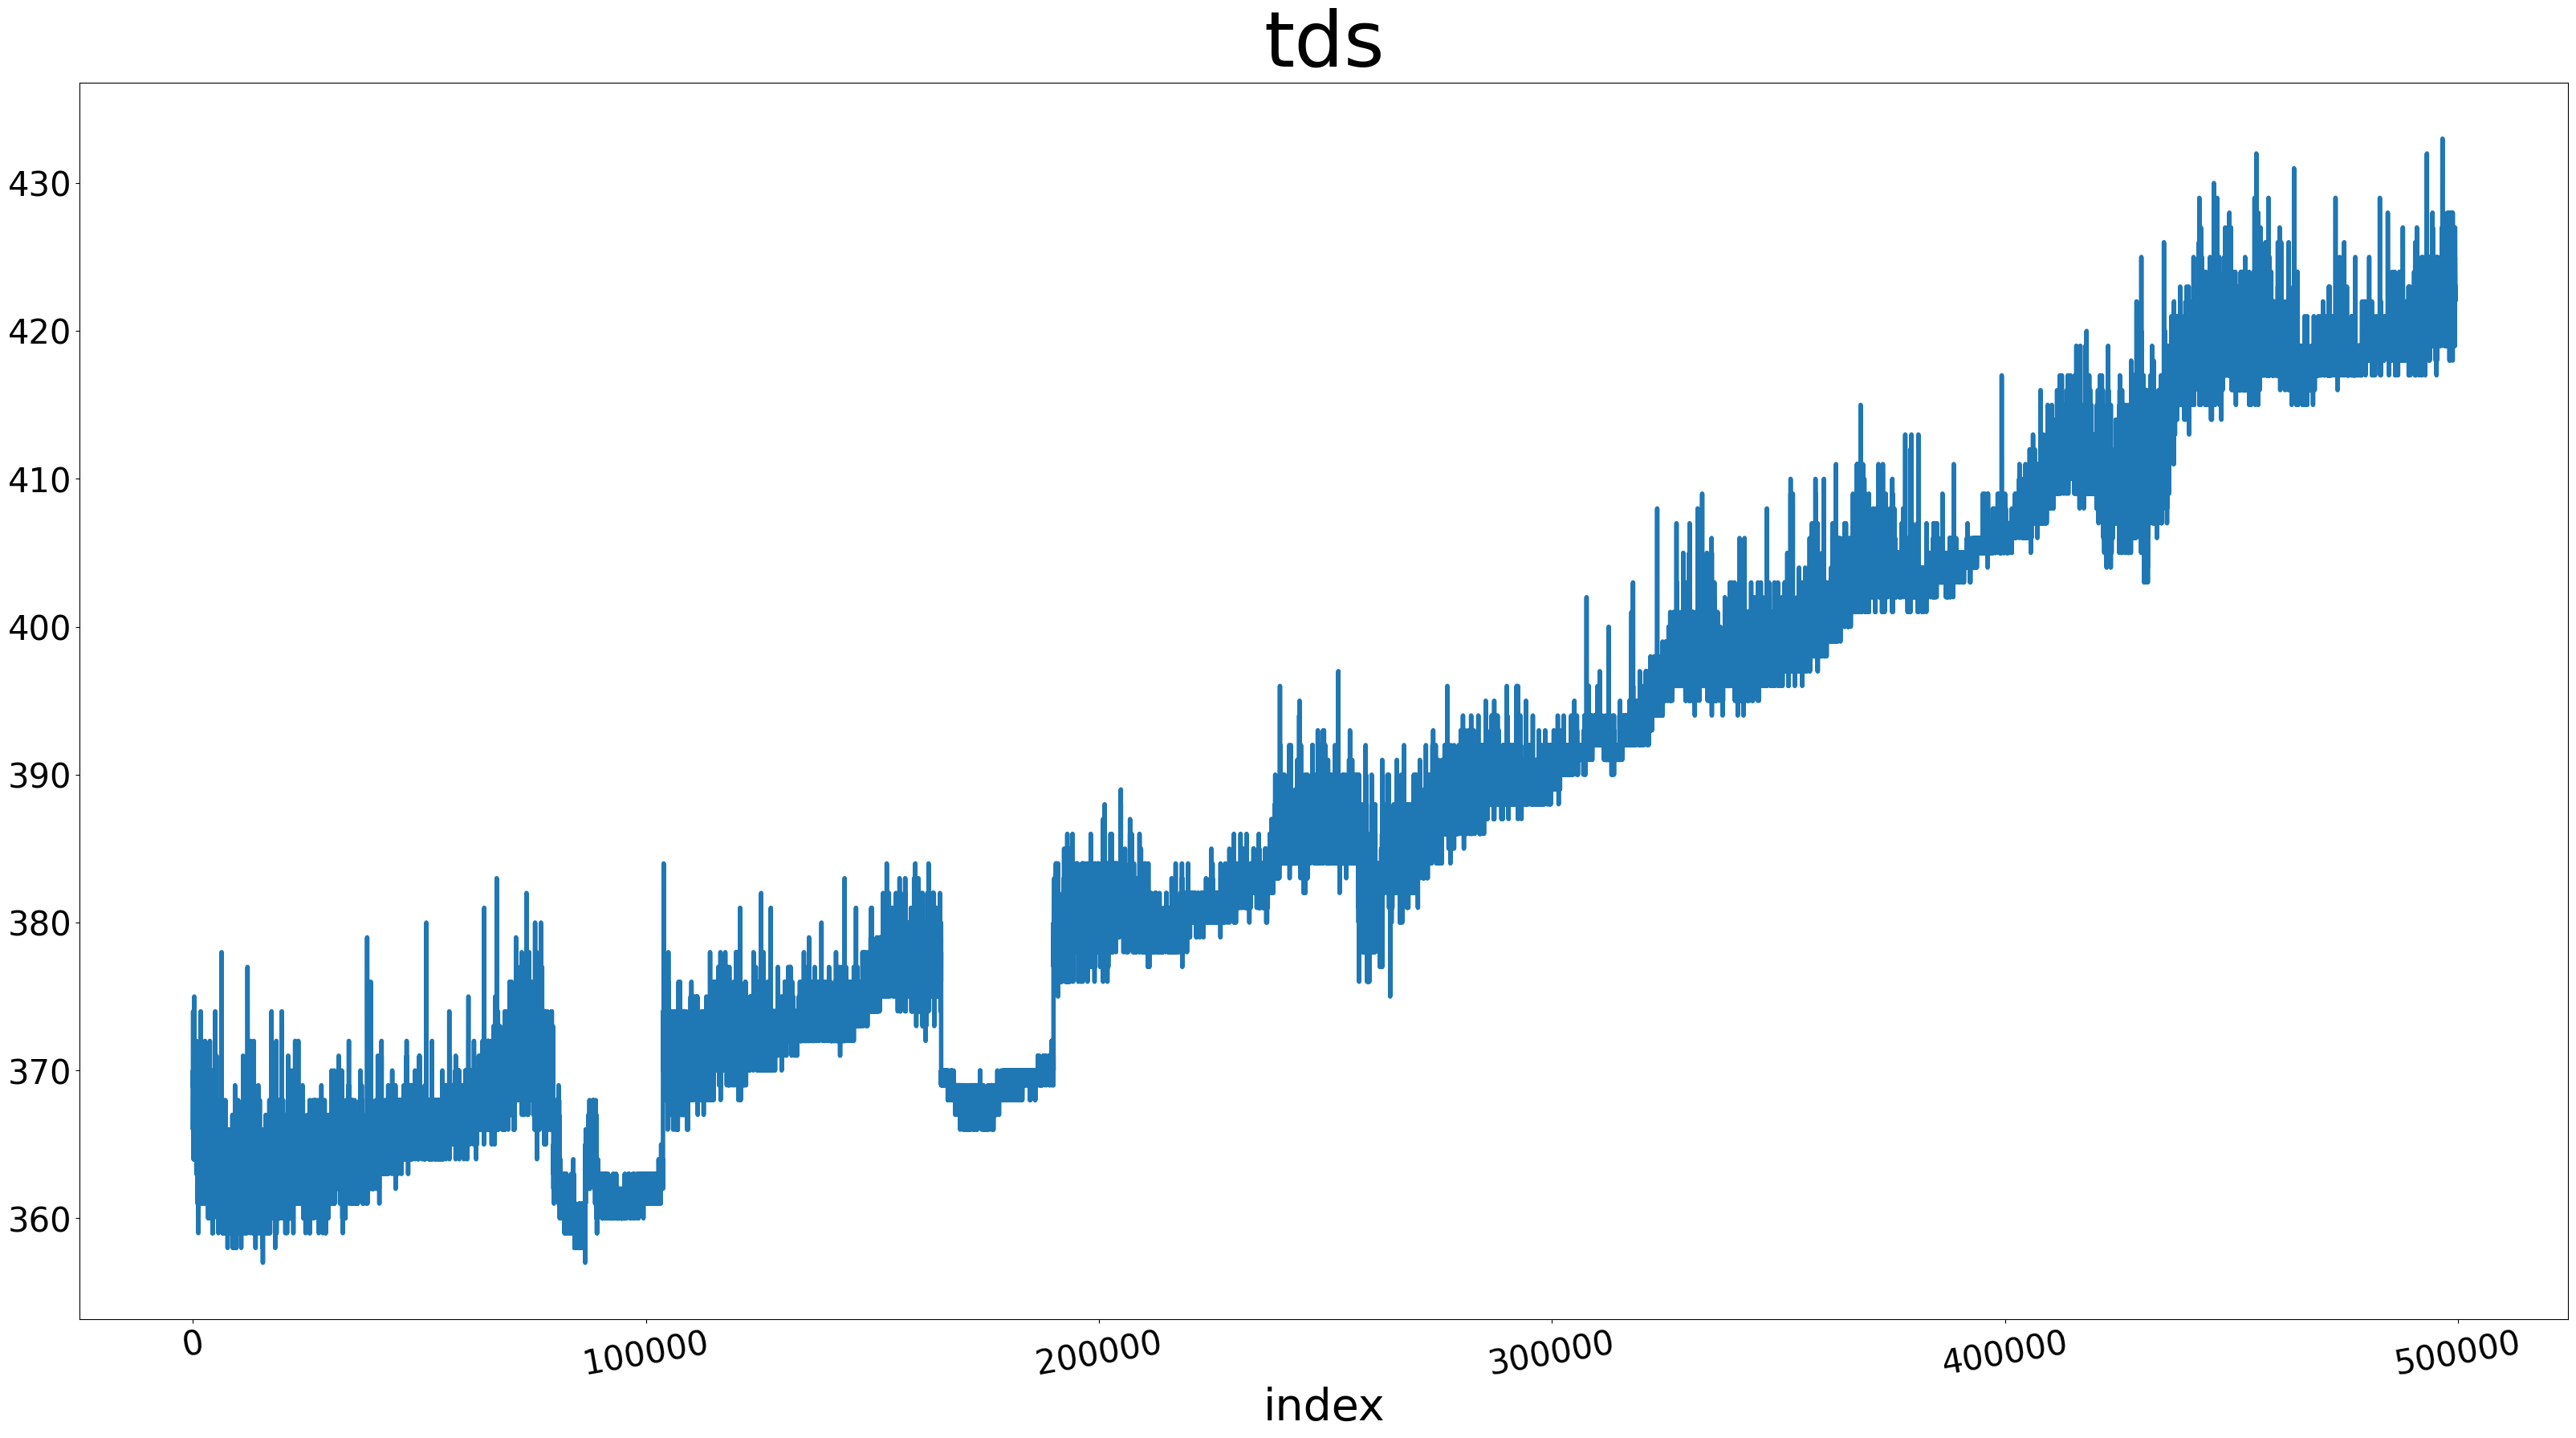

In [33]:
for column in df.drop('date',axis=1).columns:
    plt.figure(figsize=(40,20))
    plt.xlabel('index', fontsize=40)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)

    df[column].plot(linewidth=4)
    plt.title(column, fontsize=70)
    plt.tick_params(axis='x', rotation=10)
    plt.show()

## Сохраняем полученные данные в формате csv

In [34]:
df.to_csv('water_df.csv',index=False)